[Dataset: Consumer Reviews of Amazon Products](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products)

References:

https://datascience.stackexchange.com/questions/62303/difference-between-learning-curve-and-validation-curve#:~:text=A%20learning%20curve%20plots%20the,is%20too%20simple%20(biased).

https://www.dataquest.io/blog/learning-curves-machine-learning/

https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/

https://github.com/dataiku-research/mealy/blob/main/examples/plot_mealy.py

https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/#:~:text=A%20learning%20curve%20is%20a,from%20a%20training%20dataset%20incrementally.

https://machinelearningmastery.com/the-model-performance-mismatch-problem/

https://colab.research.google.com/github/DerwenAI/spaCy_tuTorial/blob/master/spaCy_tuTorial.ipynb#scrollTo=fw69vnvUELaQ

# Importing Libraries

In [1]:
!pip3 install scattertext

     |████████████████████████████████| 7.3 MB 6.6 MB/s 
     |████████████████████████████████| 24.1 MB 1.2 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=28a76d459f3f333c652ee249723f26522ed763abb55420559fa495b910f56db7
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsOneClassifier
import joblib

warnings.filterwarnings('ignore')
%matplotlib inline


import sklearn.metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

import spacy
import scattertext as st

In [5]:
# from google.colab import drive
# drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# A Quick look at the Data

Reading the Data

In [2]:
# From local system

df = pd.read_csv(r"C:\Users\vaibh\OneDrive\Desktop\ML\Project\Final project\1429_1.csv")
df.head(2)

id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
1  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   

               reviews.date     reviews.dateAdded  \
0  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
1  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   

                                    reviews.dateSeen  ... reviews.doRecommend  \
0  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
1  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   

  reviews.id  reviews.numHelpful  reviews.rating  \
0        NaN                 0.0             5.0   
1        NaN                 0.0             5.0   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5620406/review...   
1  http://reviews.bestbuy.com/3545/5620406/review...   

                                        reviews.text reviews.title  \
0  This product so far has not disappointed. My c...        Kindle   
1  great for beginner or experienced person. Boug...     very fast   

  reviews.userCity  reviews.userProvince  reviews.username  
0              NaN                   NaN           Adapter  
1              NaN                   NaN            truman  

[2 rows x 21 columns]

In [6]:
# csv = "/content/drive/MyDrive/Machine Learning/Sentiment Analysis/1429_1.csv"
# df = pd.read_csv(csv)
# df.head(2)

id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
1  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   

               reviews.date     reviews.dateAdded  \
0  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
1  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   

                                    reviews.dateSeen  ... reviews.doRecommend  \
0  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
1  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   

  reviews.id  reviews.numHelpful  reviews.rating  \
0        NaN                 0.0             5.0   
1        NaN                 0.0             5.0   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5620406/review...   
1  http://reviews.bestbuy.com/3545/5620406/review...   

                                        reviews.text reviews.title  \
0  This product so far has not disappointed. My c...        Kindle   
1  great for beginner or experienced person. Boug...     very fast   

  reviews.userCity  reviews.userProvince  reviews.username  
0              NaN                   NaN           Adapter  
1              NaN                   NaN            truman  

[2 rows x 21 columns]

In [3]:
df.tail(2)

id name       asins   brand  \
34658  AVpfiBlyLJeJML43-4Tp  NaN  B006GWO5WK  Amazon   
34659  AVpfiBlyLJeJML43-4Tp  NaN  B006GWO5WK  Amazon   

                                              categories  \
34658  Computers/Tablets & Networking,Tablet & eBook ...   
34659  Computers/Tablets & Networking,Tablet & eBook ...   

                                                    keys  \
34658  newamazonkindlefirehd9wpowerfastadaptercharger...   
34659  newamazonkindlefirehd9wpowerfastadaptercharger...   

                       manufacturer          reviews.date reviews.dateAdded  \
34658  Amazon Digital Services, Inc  2012-10-31T00:00:00Z               NaN   
34659  Amazon Digital Services, Inc  2012-12-23T00:00:00Z               NaN   

           reviews.dateSeen  ... reviews.doRecommend reviews.id  \
34658  2015-09-01T00:00:00Z  ...                 NaN        NaN   
34659  2015-11-01T00:00:00Z  ...                 NaN        NaN   

       reviews.numHelpful  reviews.rating  \
34658                 NaN             1.0   
34659                 NaN             1.0   

                                      reviews.sourceURLs  \
34658  http://www.amazon.com/Amazon-PowerFast-Adapter...   
34659  http://www.amazon.com/Amazon-PowerFast-Adapter...   

                                            reviews.text  \
34658  I was surprised to find it did not come with a...   
34659  to spite the fact that i have nothing but good...   

               reviews.title reviews.userCity  reviews.userProvince  \
34658    Not worth the money              NaN                   NaN   
34659  as with everyone else              NaN                   NaN   

       reviews.username  
34658    Just the Buyer  
34659             sandi  

[2 rows x 21 columns]

In [4]:
data = df.copy()
data.describe()

reviews.id  reviews.numHelpful  reviews.rating  reviews.userCity  \
count          1.0        34131.000000    34627.000000               0.0   
mean   111372787.0            0.630248        4.584573               NaN   
std            NaN           13.215775        0.735653               NaN   
min    111372787.0            0.000000        1.000000               NaN   
25%    111372787.0            0.000000        4.000000               NaN   
50%    111372787.0            0.000000        5.000000               NaN   
75%    111372787.0            0.000000        5.000000               NaN   
max    111372787.0          814.000000        5.000000               NaN   

       reviews.userProvince  
count                   0.0  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

We can observe from the above descriptive analysis that:


*   The most helpful review was helpful to 814 people.
*   The average review score is 4.58, the standard deviation is also low.
*   From the second quartile onwards, most of the reviews are positive.
*   The average review score is 4.58, the standard deviation is also low.
*   The data is spread out well around the mean.







In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 



*   We will drop all the columns that are only needed for exploratory analysis. It will include City, province, id, and didPurchase.
*   Review text do not have a lot of missing data.
*   We will clean up the name column by referencing asins since we have 7000 missing values



In [6]:
data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [7]:
asins_unique = len(data["asins"].unique())
print("Unique ASINs: " + str(asins_unique))

Unique ASINs: 42


Distribution analysis of numerical variables

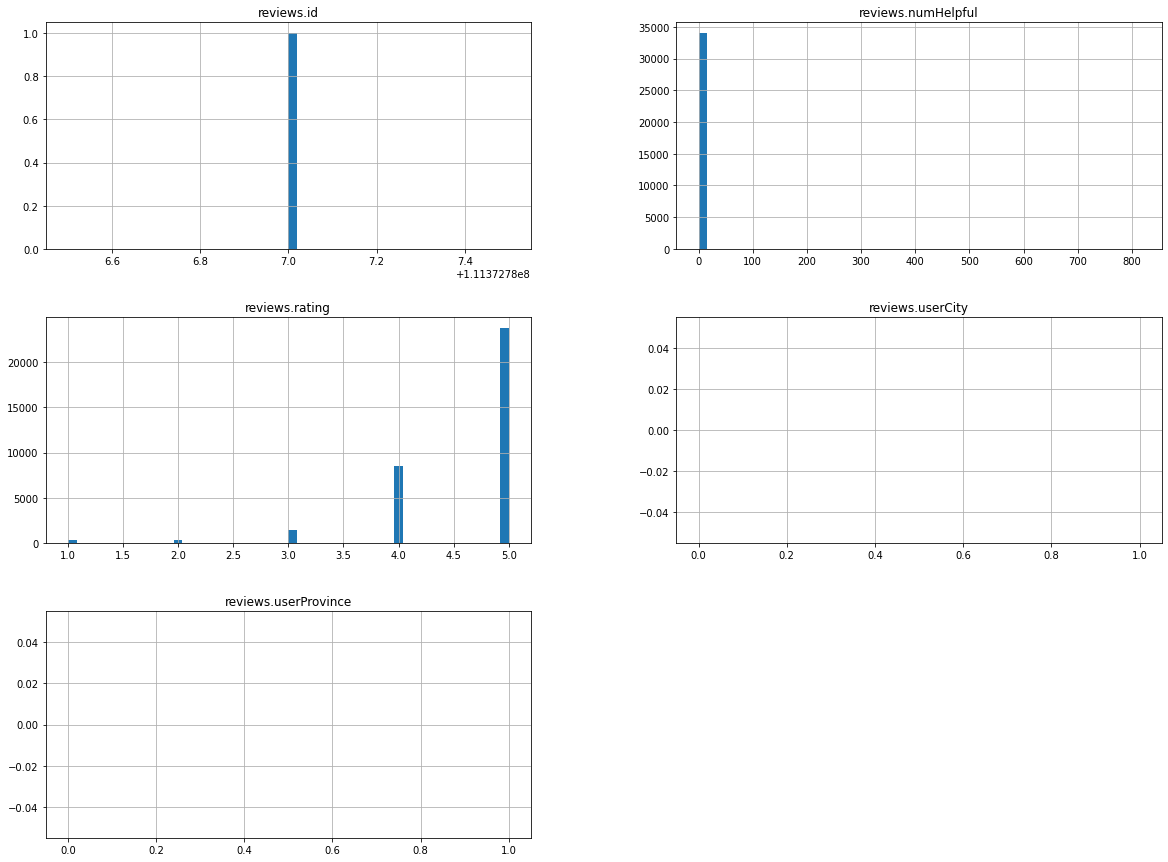

In [8]:
data.hist(bins=50, figsize=(20,15))
plt.show()



*   Outliers in the case of review.numHelpful are valuable and we might want to weight review that had more than 50 people finding them helpful.
*   We can also observe that most of the reviews are positive.



# Splitting the Data



*   As we observed previously, the majority of reviews are positive, and to make sure we do not train the classifier on the unbalanced data, we will do a stratified split on the review score.
*   We first will remove all the samples that have null values in review score and then convert them to an integer.



In [6]:
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"])
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

Before 34660
After 34627


In [10]:
dataAfter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34627 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34627 non-null  object 
 1   name                  27868 non-null  object 
 2   asins                 34625 non-null  object 
 3   brand                 34627 non-null  object 
 4   categories            34627 non-null  object 
 5   keys                  34627 non-null  object 
 6   manufacturer          34627 non-null  object 
 7   reviews.date          34598 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34627 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  int32  
 15  reviews.sourceURLs 

In [11]:
dataAfter.describe()

reviews.id  reviews.numHelpful  reviews.rating  reviews.userCity  \
count          1.0        34131.000000    34627.000000               0.0   
mean   111372787.0            0.630248        4.584573               NaN   
std            NaN           13.215775        0.735653               NaN   
min    111372787.0            0.000000        1.000000               NaN   
25%    111372787.0            0.000000        4.000000               NaN   
50%    111372787.0            0.000000        5.000000               NaN   
75%    111372787.0            0.000000        5.000000               NaN   
max    111372787.0          814.000000        5.000000               NaN   

       reviews.userProvince  
count                   0.0  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

In [12]:
dataAfter.head(5)

id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
1  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
2  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
3  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
4  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   

               reviews.date     reviews.dateAdded  \
0  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
1  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
2  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
3  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
4  2017-01-12T00:00:00.000Z  2017-07-03T23:33:15Z   

                                    reviews.dateSeen  ... reviews.doRecommend  \
0  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
1  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
2  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
3  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
4  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   

  reviews.id  reviews.numHelpful  reviews.rating  \
0        NaN                 0.0               5   
1        NaN                 0.0               5   
2        NaN                 0.0               5   
3        NaN                 0.0               4   
4        NaN                 0.0               5   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5620406/review...   
1  http://reviews.bestbuy.com/3545/5620406/review...   
2  http://reviews.bestbuy.com/3545/5620406/review...   
3  http://reviews.bestbuy.com/3545/5620406/review...   
4  http://reviews.bestbuy.com/3545/5620406/review...   

                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                             reviews.title reviews.userCity  \
0                                   Kindle              NaN   
1                                very fast              NaN   
2  Beginner tablet for our 9 year old son.              NaN   
3                                  Good!!!              NaN   
4                Fantastic Tablet for kids              NaN   

   reviews.userProvince  reviews.username  
0                   NaN           Adapter  
1                   NaN            truman  
2                   NaN             DaveZ  
3                   NaN            Shacks  
4                   NaN         explore42  

[5 rows x 21 columns]

Text(0, 0.5, 'Number of reviews')

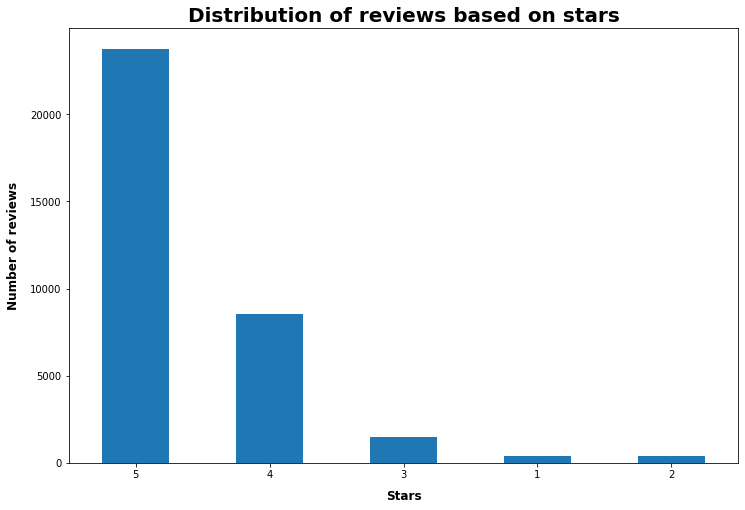

In [13]:
plt1 = dataAfter['reviews.rating'].value_counts().plot(kind='bar', figsize=(12,8), rot=0)
plt1.set_title("Distribution of reviews based on stars", weight='bold', size=20)
plt1.set_xlabel("Stars", labelpad=10, weight='bold', size=12)
plt1.set_ylabel("Number of reviews", labelpad=10, weight='bold', size=12)

In [7]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["reviews.rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

Cross Checking the Stratified Data

In [16]:
strat_train["reviews.rating"].value_counts()/len(strat_train)

5.0    0.685029
4.0    0.248583
3.0    0.042381
1.0    0.011805
2.0    0.011227
Name: reviews.rating, dtype: float64

In [17]:
strat_test["reviews.rating"].value_counts()/len(strat_test)

5.0    0.690442
4.0    0.238522
3.0    0.046636
2.0    0.012995
1.0    0.010540
Name: reviews.rating, dtype: float64

# Exploring the Data

In [18]:
reviews = strat_train.copy()
reviews.head(2)

id  \
12351  AVphgVaX1cnluZ0-DR74   
1627   AVqkIhwDv8e3D1O-lebb   

                                                    name       asins   brand  \
12351  Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...  B018Y229OU  Amazon   
1627   All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   

                                              categories  \
12351  Fire Tablets,Tablets,Computers & Tablets,All T...   
1627   Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                    keys manufacturer  \
12351  firetablet7displaywifi8gbincludesspecialoffers...       Amazon   
1627   841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   

                   reviews.date     reviews.dateAdded  \
12351  2016-03-11T00:00:00.000Z  2017-05-21T03:18:41Z   
1627   2016-12-23T00:00:00.000Z  2017-05-21T06:00:28Z   

                                        reviews.dateSeen  ...  \
12351  2017-04-30T00:22:00.000Z,2017-06-07T08:19:00.000Z  ...   
1627   2017-04-30T00:44:00.000Z,2017-06-07T09:04:00.000Z  ...   

      reviews.doRecommend reviews.id  reviews.numHelpful  reviews.rating  \
12351                True        NaN                 0.0             4.0   
1627                 True        NaN                 0.0             4.0   

                                      reviews.sourceURLs  \
12351  http://reviews.bestbuy.com/3545/5025800/review...   
1627   http://reviews.bestbuy.com/3545/5620406/review...   

                                            reviews.text  \
12351  The fire 7 is the best low priced Android tabl...   
1627   Our tablet is fast and works very well. I am p...   

                    reviews.title reviews.userCity  reviews.userProvince  \
12351  best Android for the price              NaN                   NaN   
1627                Great picture              NaN                   NaN   

       reviews.username  
12351         Anonymous  
1627               Ewok  

[2 rows x 21 columns]

In [19]:
len(reviews["name"].unique()), len(reviews["asins"].unique())

(47, 34)

In [20]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 12351 to 3108
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27674 non-null  object 
 1   name                  22272 non-null  object 
 2   asins                 27672 non-null  object 
 3   brand                 27674 non-null  object 
 4   categories            27674 non-null  object 
 5   keys                  27674 non-null  object 
 6   manufacturer          27674 non-null  object 
 7   reviews.date          27654 non-null  object 
 8   reviews.dateAdded     19203 non-null  object 
 9   reviews.dateSeen      27674 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27250 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27296 non-null  float64
 14  reviews.rating        27674 non-null  float64
 15  reviews.sourceUR

Exploring different columns in the Data

In [21]:
reviews.groupby("asins")["name"].unique()

asins
B005PB2T0S               [Kindle Keyboard,,,\r\nKindle Keyboard,,,, Ama...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B00IOY8XWQ               [Kindle Voyage E-reader, 6 High-Resolution Dis...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,, Amazo...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG                                                           [nan]
B00QJDU3KY               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00QL1ZN3G                                                           [nan]
B00REQKWGA               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00TSUGXKE                            [Echo (White),,,\r\nEcho (White),,,]
B00U3FPN4U         

In [22]:
different_names = reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)

Amazon Fire Tv,,,
Amazon Fire Tv,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Echo (White),,,
Echo (White),,,
nan
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Echo (Black),,,
Echo (Black),,,
Kindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Generation Kindle Dxs),,
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,
New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Mic

In [23]:
reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts()

Echo (White),,,\r\nEcho (White),,,                                                                                                                                                                                  2313
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                                                                                                                              2031
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,\r\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,                                                                           246
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,\r\nAmazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,                                                            99
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 9W PowerFast Offici

We can see that each asin might have different names, and hence we would be worried only about the asin that do well not the name of the product.

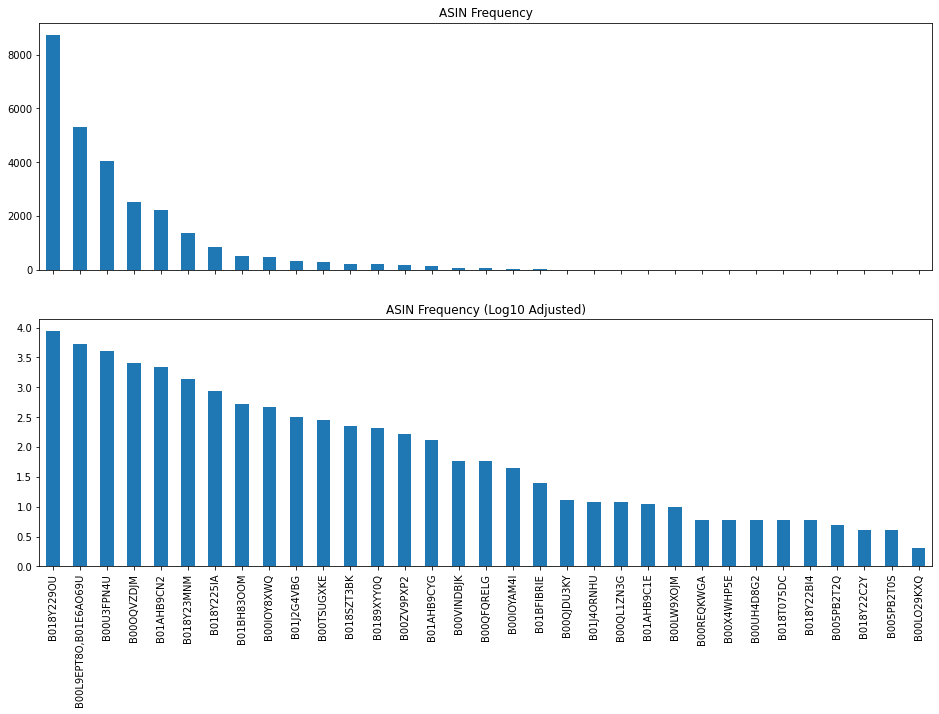

In [24]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)") 
plt.show()


*   We adjusted the asins to log10, to get a better picture of the frequency.
*   We can also observe that certain asins have singificantly higher reviews than others.
*   We can also deduce that these products have a higher sales than other products.


In [25]:
reviews["reviews.rating"].mean()

4.5853508708535085

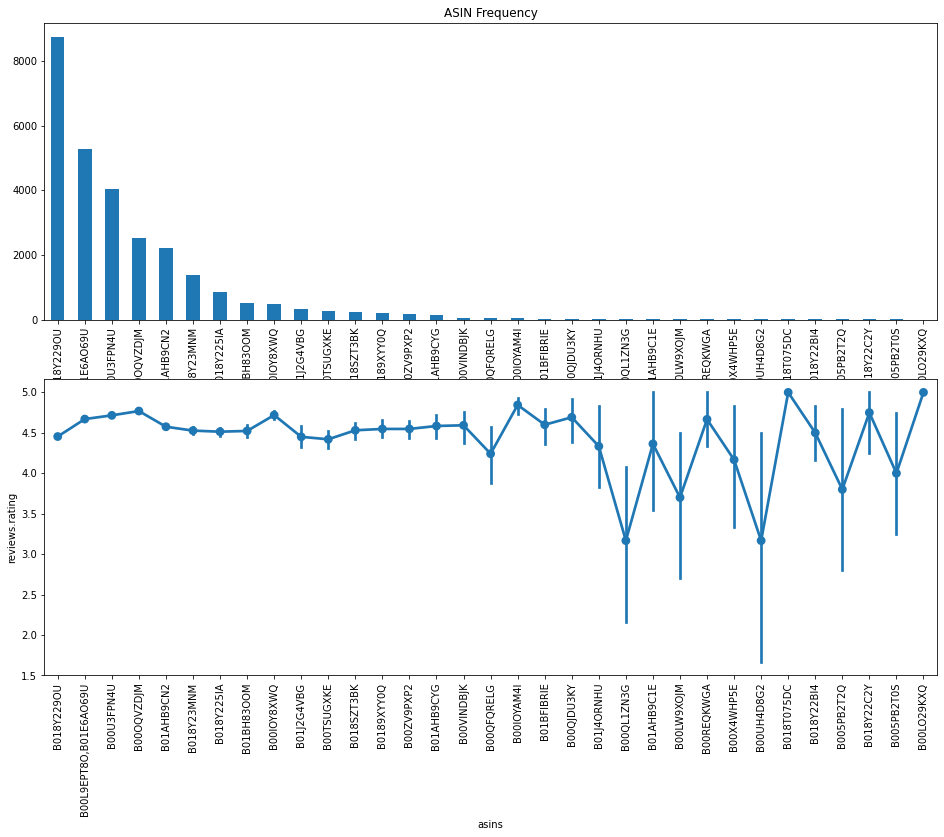

In [26]:
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()



*   Products that are most frequently reviewed have an average review rating in the 4.5 to 4.9 range.
*   For the first 4 asins, average review rating and the frequency are inversely proptional but that would not make a difference as they lie in a range which is considered as a good rating.
*   We can also observe that the asins that have high variance (length of the vertical lines) but have low frequencies are not significant for the analysis.
*   The last 4 asins have a very low frequency and would not be considered significant in our analysis.

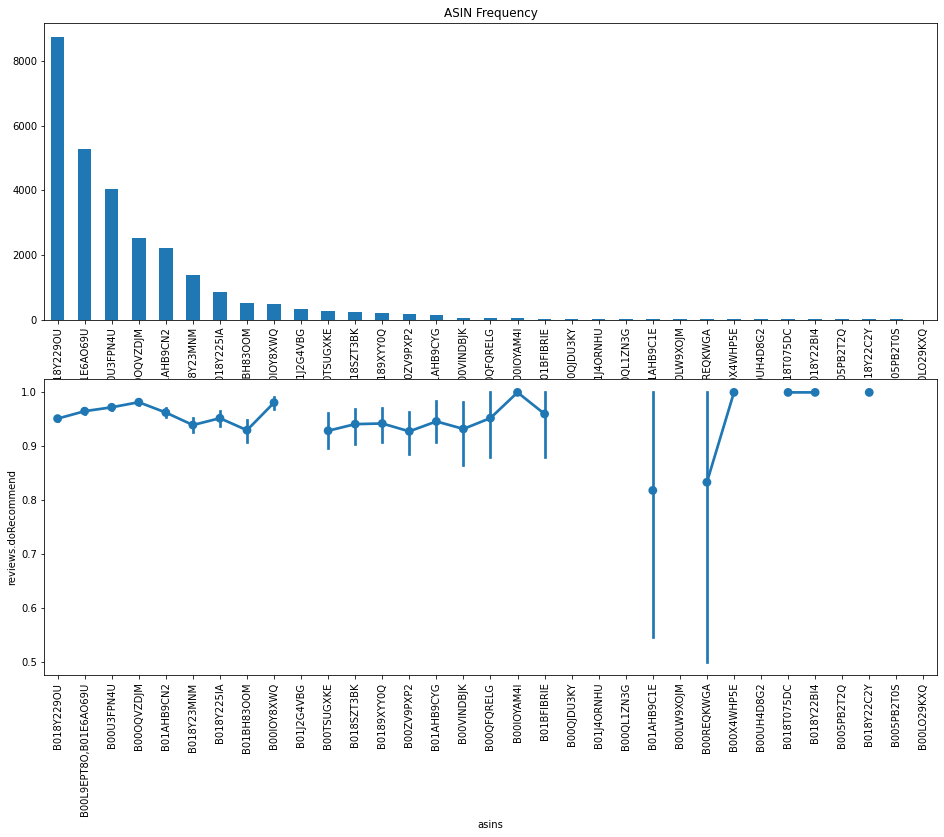

In [27]:
plt.subplots (2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()



*   We can observe from the above plot that first 19 asins have been recommended by people which also resonates with the previous analysis of ratings.
*   The remaining asins have a noisy doRecommend and would not be considered.



# Correlation

In [28]:
corr_matrix = reviews.corr()
corr_matrix

reviews.id  reviews.numHelpful  reviews.rating  \
reviews.id                   NaN                 NaN             NaN   
reviews.numHelpful           NaN            1.000000       -0.042279   
reviews.rating               NaN           -0.042279        1.000000   
reviews.userCity             NaN                 NaN             NaN   
reviews.userProvince         NaN                 NaN             NaN   

                      reviews.userCity  reviews.userProvince  
reviews.id                         NaN                   NaN  
reviews.numHelpful                 NaN                   NaN  
reviews.rating                     NaN                   NaN  
reviews.userCity                   NaN                   NaN  
reviews.userProvince               NaN                   NaN

In [29]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 12351 to 3108
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27674 non-null  object 
 1   name                  22272 non-null  object 
 2   asins                 27672 non-null  object 
 3   brand                 27674 non-null  object 
 4   categories            27674 non-null  object 
 5   keys                  27674 non-null  object 
 6   manufacturer          27674 non-null  object 
 7   reviews.date          27654 non-null  object 
 8   reviews.dateAdded     19203 non-null  object 
 9   reviews.dateSeen      27674 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27250 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27296 non-null  float64
 14  reviews.rating        27674 non-null  float64
 15  reviews.sourceUR

In [30]:
counts = reviews["asins"].value_counts().to_frame()
counts.head()

asins
B018Y229OU              8740
B00L9EPT8O,B01E6AO69U   5290
B00U3FPN4U              4054
B00OQVZDJM              2529
B01AHB9CN2              2221

In [31]:
counts = reviews["asins"].value_counts().to_frame()
counts.head()

asins
B018Y229OU              8740
B00L9EPT8O,B01E6AO69U   5290
B00U3FPN4U              4054
B00OQVZDJM              2529
B01AHB9CN2              2221

In [32]:
avg_rating = reviews.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()

reviews.rating
asins                                
B005PB2T0S                   4.000000
B005PB2T2Q                   3.800000
B00IOY8XWQ                   4.719409
B00IOYAM4I                   4.844444
B00L9EPT8O,B01E6AO69U        4.670132

In [33]:
table = counts.join(avg_rating)
table.head(30)

asins  reviews.rating
B018Y229OU              8740        4.454233
B00L9EPT8O,B01E6AO69U   5290        4.670132
B00U3FPN4U              4054        4.716083
B00OQVZDJM              2529        4.769474
B01AHB9CN2              2221        4.575416
B018Y23MNM              1371        4.527352
B018Y225IA               856        4.514019
B01BH83OOM               516        4.523256
B00IOY8XWQ               474        4.719409
B01J2G4VBG               324        4.450617
B00TSUGXKE               281        4.419929
B018SZT3BK               222        4.531532
B0189XYY0Q               208        4.548077
B00ZV9PXP2               166        4.548193
B01AHB9CYG               130        4.584615
B00VINDBJK                59        4.593220
B00QFQRELG                58        4.241379
B00IOYAM4I                45        4.844444
B01BFIBRIE                25        4.600000
B00QJDU3KY                13        4.692308
B01J4ORNHU                12        4.333333
B00QL1ZN3G                12        3.166667
B01AHB9C1E                11        4.363636
B00LW9XOJM                10        3.700000
B00REQKWGA                 6        4.666667
B00X4WHP5E                 6        4.166667
B00UH4D8G2                 6        3.166667
B018T075DC                 6        5.000000
B018Y22BI4                 6        4.500000
B005PB2T2Q                 5        3.800000

asins  reviews.rating
asins           1.000000        0.167512
reviews.rating  0.167512        1.000000

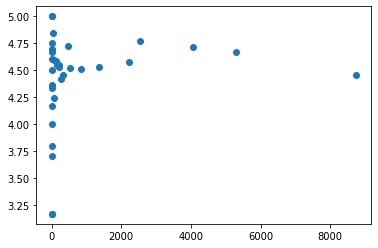

In [34]:
plt.scatter("asins", "reviews.rating", data=table)
table.corr()

Given the sample size to be low and some asins having low occurences and high variance, we would not consider them in our analysis.

# Analyzing the Sentiment

Setting the target variables

In [8]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"

# def sentiments(rating):
#     if rating < 3:
#         return 1
#     elif rating == 3:
#         return 2
#     else:
#         return 3

# Add sentiments to the data
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
strat_train["Sentiment"][20:30]

31529    Positive
4        Positive
22875    Positive
10263     Neutral
23908    Positive
31284    Positive
6083      Neutral
13900    Positive
17781    Positive
9296     Positive
Name: Sentiment, dtype: object

Text(0, 0.5, 'Number of reviews')

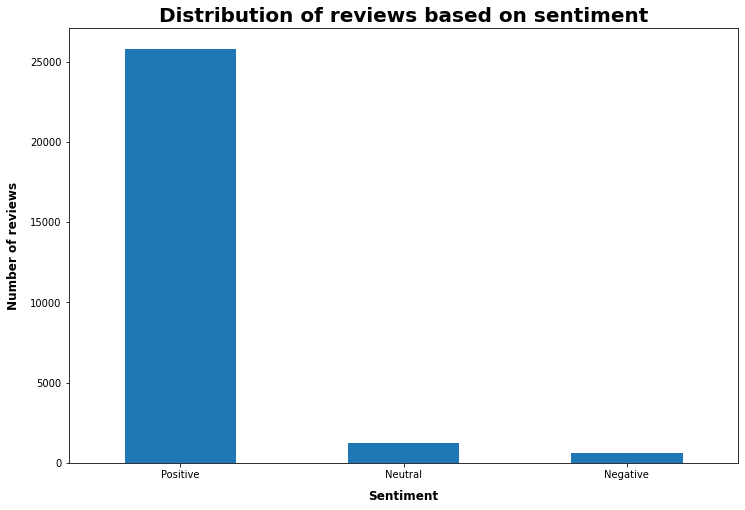

In [16]:
plt2 = strat_train['Sentiment'].value_counts().plot(kind='bar', figsize=(12,8), rot=0)
plt2.set_title("Distribution of reviews based on sentiment", weight='bold', size=20)
plt2.set_xlabel("Sentiment", labelpad=10, weight='bold', size=12)
plt2.set_ylabel("Number of reviews", labelpad=10, weight='bold', size=12)

In [9]:
nlp = spacy.load('en_core_web_sm')
corpus = st.CorpusFromPandas(strat_train, category_col='Sentiment', text_col='reviews.text', nlp=nlp).build()

In [10]:
sent = st.produce_scattertext_explorer(corpus, category='Positive', category_name='Positive', not_category_name='Negative', width_in_pixels=1500)

In [11]:
html_file_name = "amazonreviews.html"
open(html_file_name, 'wb').write(sent.encode('utf-8'))

6352196

In [15]:
import IPython
IPython.display.HTML(open(r'C:\Users\vaibh\OneDrive\Desktop\ML\Project\Final project\amazonreviews.html').read())

In [ ]:
# from IPython.display import IFrame
# IFrame(src=html_file_name, width=1200, height=700)

3 Star ratings will be neutral, 4 or 5 starts will be a positive rating while 1 or 2 star will be considered negative.

In [16]:
X_train = strat_train["reviews.text"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["reviews.text"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

27701 6926


## Pre-Processing and Feature Extraction

We will use the 'Bag of Words' strategy to turn the data into numerical features.
We pre-process the text using:


*   Tokenization: Breaking the review text into words.
*   Stopwords Filteration: Words like "the", "are" are filtered.
*   We will use occurence counting, which will build a dictionary of features from integer indices with word occurences.
*   We will convert this dictionary of texts into a feature vector.



In [17]:
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape
#X_test_targetSentiment[20:30]

(27701, 12457)

We have 27701 training samples with 12487 distinct words. In longer text documents, we see a higher average count value of words that are insignificant, this particular problem will overweigh the text documents that have lower average counts with same frequency.
To overcome this redundancy, we will be using TfidfTransformer.

In [18]:
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(27701, 12457)

In [19]:
y_train = label_binarize(X_train_targetSentiment, classes=["Positive", "Neutral", "Negative"])
y_test = label_binarize(X_test_targetSentiment, classes=["Positive", "Neutral", "Negative"])
#y_train[:50]

## Multinomial Naive Bayes

Building the pipeline

In [45]:
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
#clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)
#clf_multiNB_pipe.fit(X_train, y_train)

Tuning Hyperparameters

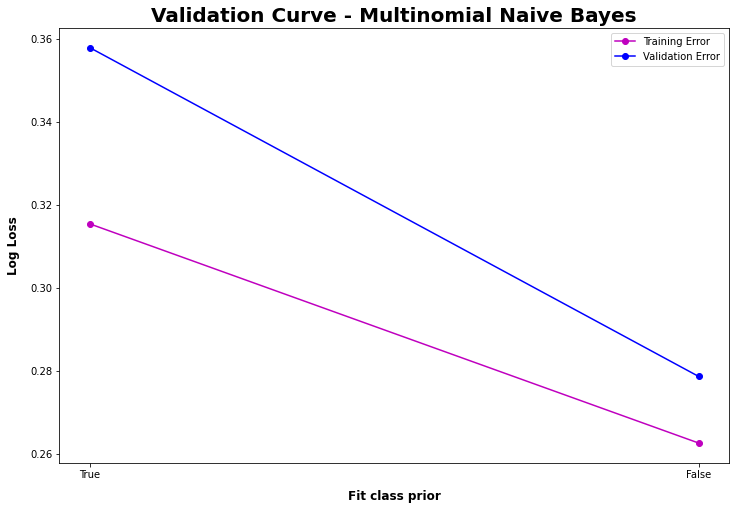

In [46]:
prior = [True,False]
prior_label = ['True','False']

train_param_NB, val_param_NB = validation_curve(clf_multiNB_pipe, X_train, X_train_targetSentiment, param_name='clf_nominalNB__fit_prior', param_range=prior, cv=5, scoring='neg_log_loss', n_jobs=-1)

tpar_NB_mean = -np.mean(train_param_NB, axis=1)
vpar_NB_mean = -np.mean(val_param_NB, axis=1) 

plt.figure(figsize=(12,8))
plt.plot(prior_label, tpar_NB_mean, 'o-', color='m', label='Training Error')
plt.plot(prior_label, vpar_NB_mean, 'o-', color='b', label='Validation Error')  
plt.xlabel("Fit class prior", labelpad=10, weight='bold', size=12)
plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
plt.title("Validation Curve - Multinomial Naive Bayes", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
plt.show()

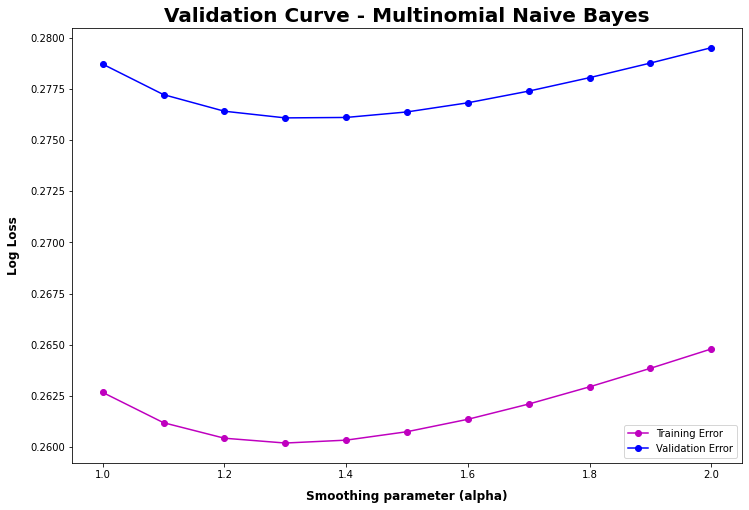

In [47]:
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB(fit_prior=False))])
#clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

smoothing = np.arange(1,2.1,0.1)

train_param_NB, val_param_NB = validation_curve(clf_multiNB_pipe, X_train, X_train_targetSentiment, param_name='clf_nominalNB__alpha', param_range=smoothing, cv=5, scoring='neg_log_loss', n_jobs=-1)

tpar_NB_mean = -np.mean(train_param_NB, axis=1)
vpar_NB_mean = -np.mean(val_param_NB, axis=1) 

plt.figure(figsize=(12,8))
plt.plot(smoothing,tpar_NB_mean, 'o-', color='m', label='Training Error')
plt.plot(smoothing,vpar_NB_mean, 'o-', color='b', label='Validation Error')  
plt.xlabel("Smoothing parameter (alpha)", labelpad=10, weight='bold', size=12)
plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
plt.title("Validation Curve - Multinomial Naive Bayes", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
plt.show()

Plotting learning curves, to observe model performance as a function of number of samples

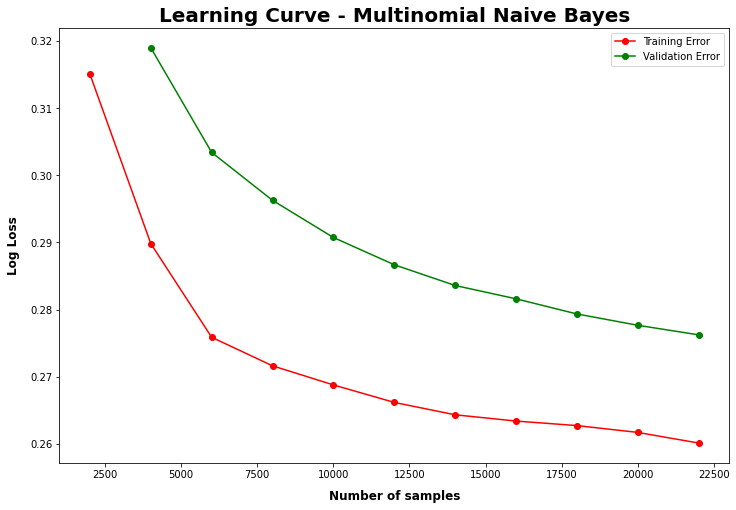

In [48]:
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB(alpha=1.3, fit_prior=False))])
#clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

train_sizes = np.arange(2000, 4*len(X_train_targetSentiment)//5, 2000)

train_sizes_NB, train_score_NB, val_score_NB = learning_curve(clf_multiNB_pipe, X_train, X_train_targetSentiment, train_sizes = train_sizes, cv=5, scoring='neg_log_loss', n_jobs=-1, shuffle=True, random_state=42)

tsc_NB_mean = -np.mean(train_score_NB, axis=1)
vsc_NB_mean = -np.mean(val_score_NB, axis=1)

plt.figure(figsize=(12,8))
plt.plot(train_sizes_NB, tsc_NB_mean, 'o-', color='r', label="Training Error")
plt.plot(train_sizes_NB, vsc_NB_mean, 'o-', color='g', label="Validation Error")
plt.xlabel("Number of samples", labelpad=10, weight='bold', size=12)
plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
plt.title("Learning Curve - Multinomial Naive Bayes", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
#plt.ylim(0.92,0.96)
plt.show()

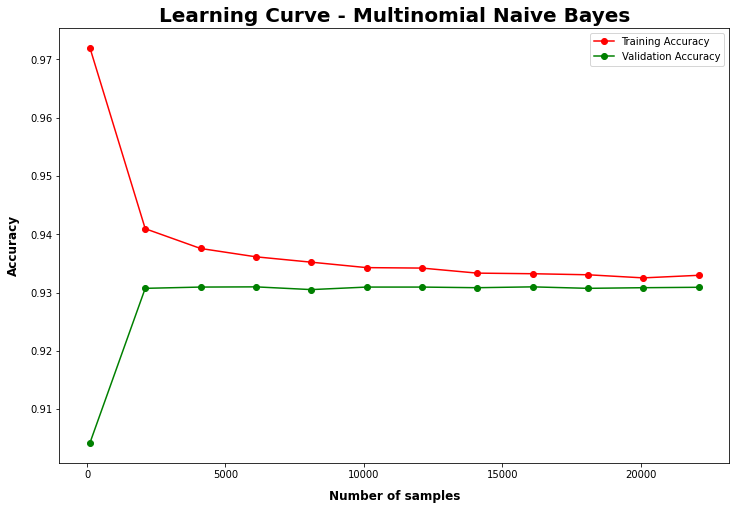

In [49]:
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB(alpha=1.3, fit_prior=False))])
#clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

train_sizes = np.arange(100, 4*len(X_train_targetSentiment)//5, 2000)

train_sizes_NB, train_score_NB, val_score_NB = learning_curve(clf_multiNB_pipe, X_train, X_train_targetSentiment, train_sizes = train_sizes, cv=5, scoring='accuracy', n_jobs=-1, shuffle=True, random_state=42)

tsc_NB_mean = np.mean(train_score_NB, axis=1)
vsc_NB_mean = np.mean(val_score_NB, axis=1)

plt.figure(figsize=(12,8))
plt.plot(train_sizes_NB, tsc_NB_mean, 'o-', color='r', label="Training Accuracy")
plt.plot(train_sizes_NB, vsc_NB_mean, 'o-', color='g', label="Validation Accuracy")
plt.xlabel("Number of samples", labelpad=10, weight='bold', size=12)
plt.ylabel("Accuracy", labelpad=10, weight='bold', size=12)
plt.title("Learning Curve - Multinomial Naive Bayes", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
#plt.ylim(0.92,0.96)
plt.show()

Evaluating performance on the test set

In [50]:
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB(alpha=1.3, fit_prior=False))])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

predictedMultiNB = clf_multiNB_pipe.predict(X_test)
pNB = label_binarize(predictedMultiNB, classes=["Positive", "Neutral", "Negative"])
# print(X_test_targetSentiment[0],predictedMultiNB[0])
# print(X_test_targetSentiment[:5])
# print(predictedMultiNB[:5])
print(np.mean(predictedMultiNB == X_test_targetSentiment))
print("\nAccuracy: " , sklearn.metrics.accuracy_score(y_test, pNB))
print("\nConfusion Matrix: \n" , sklearn.metrics.multilabel_confusion_matrix(y_test, pNB))
print("\nF1 Score: " , sklearn.metrics.f1_score(y_test, pNB, average=None))
print("\nAvg F1 Score: ", np.mean(sklearn.metrics.f1_score(y_test, pNB, average=None)))
print("\nPrecision Score: " , sklearn.metrics.precision_score(y_test, pNB, average=None))
print("\nAvg Precision Score: " , np.mean(sklearn.metrics.precision_score(y_test, pNB, average=None)))
print("\nRecall Score: " , sklearn.metrics.recall_score(y_test, pNB, average=None))
print("\nAvg Recall Score: " , np.mean(sklearn.metrics.recall_score(y_test, pNB, average=None)))
print("\nLog Loss: " , sklearn.metrics.log_loss(y_test, pNB))
print("\nClassification Report: \n", sklearn.metrics.classification_report(y_test, pNB, target_names=['Positive', 'Neutral', 'Negative']))

0.9237655212243719

Accuracy:  0.9237655212243719

Confusion Matrix: 
 [[[  29  463]
  [  58 6376]]

 [[6560   43]
  [ 315    8]]

 [[6749   14]
  [ 155    8]]]

F1 Score:  [0.96074738 0.04278075 0.08648649]

Avg F1 Score:  0.3633382056842332

Precision Score:  [0.93230004 0.15686275 0.36363636]

Avg Precision Score:  0.4842663842001551

Recall Score:  [0.99098539 0.0247678  0.04907975]

Avg Recall Score:  0.35494431552460864

Log Loss:  2.594419957213819

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.93      0.99      0.96      6434
     Neutral       0.16      0.02      0.04       323
    Negative       0.36      0.05      0.09       163

   micro avg       0.92      0.92      0.92      6920
   macro avg       0.48      0.35      0.36      6920
weighted avg       0.88      0.92      0.90      6920
 samples avg       0.92      0.92      0.92      6920



Plotting ROC Curves

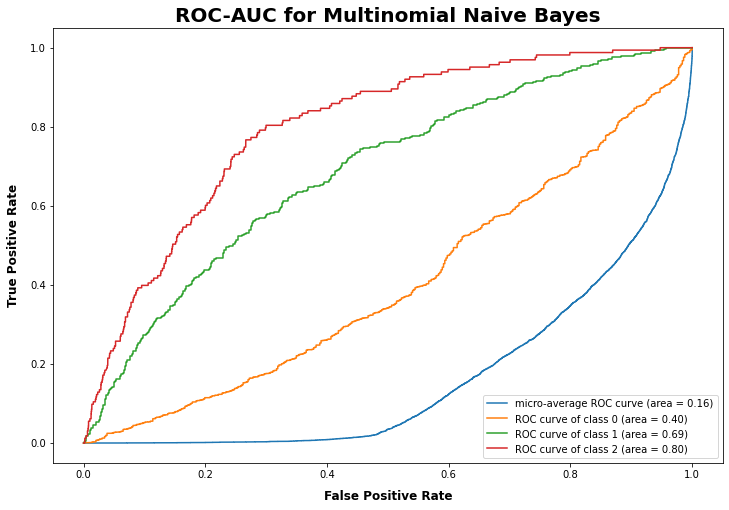

In [51]:
# clf_multiNB_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB(alpha=1.3, fit_prior=False))])
# clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

probMultiNB = clf_multiNB_pipe.predict_proba(X_test)
#probMultiNB = clf_multiNB_pipe.decision_function(X_test)
#print(probMultiNB[:5])

fprNB, tprNB, roc_aucNB = dict(), dict(), dict()
n_classes = y_train.shape[1]

for i in range(n_classes):
    fprNB[i], tprNB[i], _ = sklearn.metrics.roc_curve(y_test[:, i], probMultiNB[:, i])
    roc_aucNB[i] = sklearn.metrics.auc(fprNB[i], tprNB[i])

fprNB["micro"], tprNB["micro"], _ = sklearn.metrics.roc_curve(y_test.ravel(), probMultiNB[:,1:].ravel())
roc_aucNB["micro"] = sklearn.metrics.auc(fprNB["micro"], tprNB["micro"])

plt.figure(figsize=(12,8))
plt.plot(fprNB["micro"], tprNB["micro"], label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_aucNB["micro"]))
#print(roc_aucNB)
#plt.plot(fprNB[0], tprNB[0], label='ROC curve of class \"Positive\" (area = {1:0.2f})'''.format(roc_aucNB[1]))
for i in range(n_classes):
    plt.plot(fprNB[i], tprNB[i], label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_aucNB[i]))

plt.xlabel('False Positive Rate', labelpad=10, weight='bold', size=12)
plt.ylabel('True Positive Rate', labelpad=10, weight='bold', size=12)
plt.title('ROC-AUC for Multinomial Naive Bayes', weight='bold', size=20)
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

Building the pipeline

In [52]:
clf_logReg_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression(solver='saga', n_jobs=-1))])
#clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

Tuning Hyperparameters

Which regularization yields best result

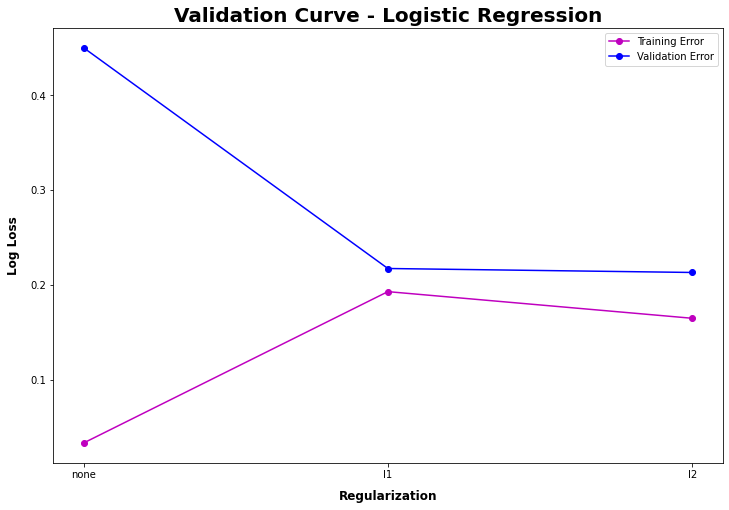

In [53]:
regularization = ['none','l1','l2']

train_param_LogReg, val_param_LogReg = validation_curve(clf_logReg_pipe, X_train, X_train_targetSentiment, param_name='clf_logReg__penalty', param_range=regularization, cv=5, scoring='neg_log_loss', n_jobs=-1)

tpar_LogReg_mean = -np.mean(train_param_LogReg, axis=1)
vpar_LogReg_mean = -np.mean(val_param_LogReg, axis=1) 

plt.figure(figsize=(12,8))
plt.plot(regularization,tpar_LogReg_mean, 'o-', color='m', label='Training Error')
plt.plot(regularization,vpar_LogReg_mean, 'o-', color='b', label='Validation Error')  
plt.xlabel("Regularization", labelpad=10, weight='bold', size=12)
plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
plt.title("Validation Curve - Logistic Regression", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
plt.show()

Find out what value of regularization parameter gives the best result

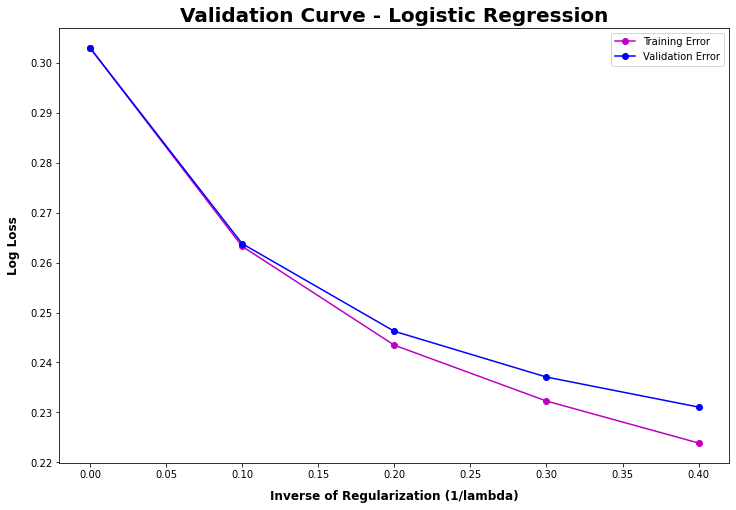

In [54]:
clf_logReg_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression(penalty='l1', solver='saga', n_jobs=-1))])
#clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

reg_range = np.arange(0,0.5,0.1)

train_param_LogReg, val_param_LogReg = validation_curve(clf_logReg_pipe, X_train, X_train_targetSentiment, param_name='clf_logReg__C', param_range=reg_range, cv=5, scoring='neg_log_loss', n_jobs=-1)

tpar_LogReg_mean = -np.mean(train_param_LogReg, axis=1)
vpar_LogReg_mean = -np.mean(val_param_LogReg, axis=1) 

plt.figure(figsize=(12,8))
plt.plot(reg_range,tpar_LogReg_mean, 'o-', color='m', label='Training Error')
plt.plot(reg_range,vpar_LogReg_mean, 'o-', color='b', label='Validation Error')  
plt.xlabel("Inverse of Regularization (1/lambda)", labelpad=10, weight='bold', size=12)
plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
plt.title("Validation Curve - Logistic Regression", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
plt.show()

Plotting learning curves, to observe model performance as a function of number of samples

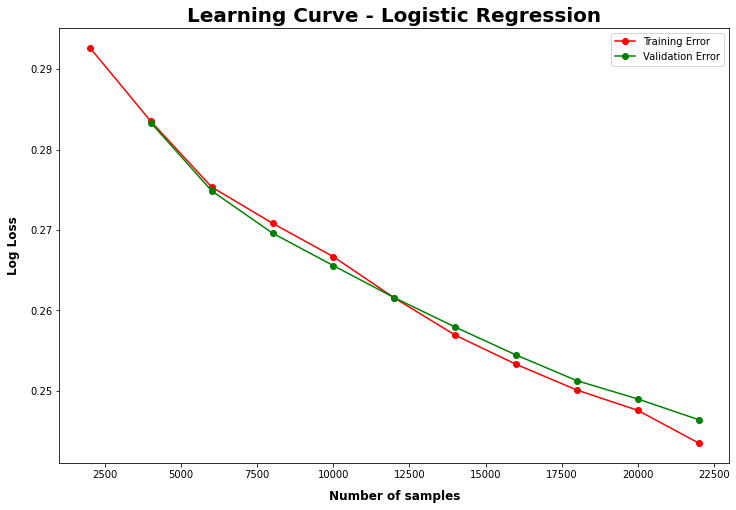

In [55]:
clf_logReg_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression(penalty='l1', C=0.2, solver='saga', n_jobs=-1))])
#clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

train_sizes = np.arange(1, 4*len(X_train_targetSentiment)//5, 2000)

train_sizes_LogReg, train_score_LogReg, val_score_LogReg = learning_curve(clf_logReg_pipe, X_train, X_train_targetSentiment, train_sizes = train_sizes, cv=5, scoring='neg_log_loss', n_jobs=-1, shuffle=True, random_state=42)

tsc_LogReg_mean = -np.mean(train_score_LogReg, axis=1)
vsc_LogReg_mean = -np.mean(val_score_LogReg, axis=1)

plt.figure(figsize=(12,8))
plt.plot(train_sizes_LogReg, tsc_LogReg_mean, 'o-', color='r', label="Training Error")
plt.plot(train_sizes_LogReg, vsc_LogReg_mean, 'o-', color='g', label="Validation Error")
plt.xlabel("Number of samples", labelpad=10, weight='bold', size=12)
plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
plt.title("Learning Curve - Logistic Regression", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
#plt.ylim(0.92,0.96)
plt.show()

In [ ]:
# sorted(sklearn.metrics.SCORERS.keys())

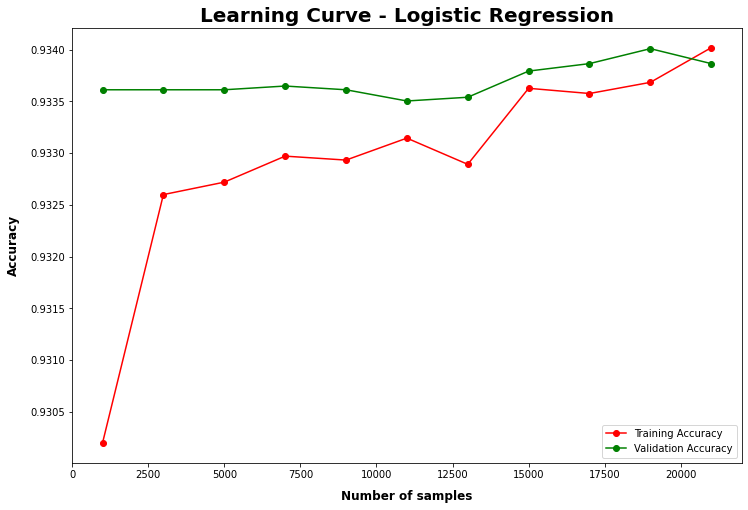

In [59]:
clf_logReg_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression(penalty='l1', C=0.2, solver='saga', n_jobs=-1))])
#clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

train_sizes = np.arange(1000, 4*len(X_train_targetSentiment)//5, 2000)

train_sizes_LogReg, train_score_LogReg, val_score_LogReg = learning_curve(clf_logReg_pipe, X_train, X_train_targetSentiment, train_sizes = train_sizes, cv=5, scoring='accuracy', n_jobs=-1, shuffle=True, random_state=42)

#print(train_score_LogReg[:5])

tsc_LogReg_mean = np.mean(train_score_LogReg, axis=1)
vsc_LogReg_mean = np.mean(val_score_LogReg, axis=1)

plt.figure(figsize=(12,8))
plt.plot(train_sizes_LogReg, tsc_LogReg_mean, 'o-', color='r', label="Training Accuracy")
plt.plot(train_sizes_LogReg, vsc_LogReg_mean, 'o-', color='g', label="Validation Accuracy")
plt.xlabel("Number of samples", labelpad=10, weight='bold', size=12)
plt.ylabel("Accuracy", labelpad=10, weight='bold', size=12)
plt.title("Learning Curve - Logistic Regression", weight='bold', size=20)
plt.legend(loc="lower right", fontsize='medium')
#plt.ylim(0.92,0.96)
plt.show()

Evaluating performance on the test set

In [60]:
clf_logReg_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression(penalty='l1', C=0.2, solver='saga', n_jobs=-1))])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

predictedLogReg = clf_logReg_pipe.predict(X_test)
pLR = label_binarize(predictedLogReg, classes=["Positive", "Neutral", "Negative"])

print(np.mean(predictedLogReg == X_test_targetSentiment))
print("\nAccuracy: " , sklearn.metrics.accuracy_score(y_test, pLR))
print("\nConfusion Matrix: \n" , sklearn.metrics.multilabel_confusion_matrix(y_test, pLR))
print("\nF1 Score: " , sklearn.metrics.f1_score(y_test, pLR, average=None))
print("\nAvg F1 Score: ", np.mean(sklearn.metrics.f1_score(y_test, pLR, average=None)))
print("\nPrecision Score: " , sklearn.metrics.precision_score(y_test, pLR, average=None))
print("\nAvg Precision Score: " , np.mean(sklearn.metrics.precision_score(y_test, pLR, average=None)))
print("\nRecall Score: " , sklearn.metrics.recall_score(y_test, pLR, average=None))
print("\nAvg Recall Score: " , np.mean(sklearn.metrics.recall_score(y_test, pLR, average=None)))
print("\nLog Loss: " , sklearn.metrics.log_loss(y_test, pLR))
print("\nClassification Report: \n", sklearn.metrics.classification_report(y_test, pLR, target_names=['Positive', 'Neutral', 'Negative']))

0.9291077100779671

Accuracy:  0.9291077100779671

Confusion Matrix: 
 [[[  17  475]
  [   8 6426]]

 [[6589   14]
  [ 316    7]]

 [[6761    2]
  [ 161    2]]]

F1 Score:  [0.96377953 0.04069767 0.0239521 ]

Avg F1 Score:  0.342809765928681

Precision Score:  [0.9311694  0.33333333 0.5       ]

Avg Precision Score:  0.5881675763576938

Recall Score:  [0.99875661 0.02167183 0.01226994]

Avg Recall Score:  0.3442327902695997

Log Loss:  2.418611976831027

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.93      1.00      0.96      6434
     Neutral       0.33      0.02      0.04       323
    Negative       0.50      0.01      0.02       163

   micro avg       0.93      0.93      0.93      6920
   macro avg       0.59      0.34      0.34      6920
weighted avg       0.89      0.93      0.90      6920
 samples avg       0.93      0.93      0.93      6920



Plotting ROC Curves

(6926, 4)


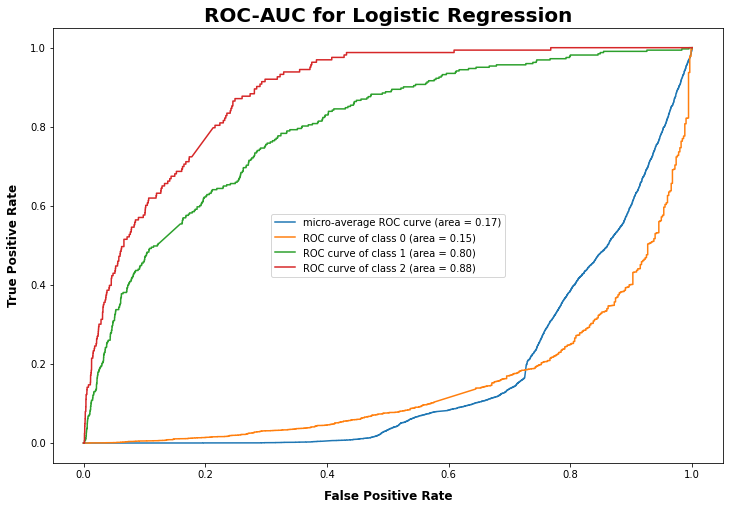

In [61]:
# clf_logReg_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression(penalty='l1', C=0.2, solver='saga', n_jobs=-1))])
# clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

probLogReg = clf_logReg_pipe.predict_proba(X_test)
#probLogReg = clf_logReg_pipe.decision_function(X_test)
print(probLogReg.shape)

fprLogReg, tprLogReg, roc_aucLogReg = dict(), dict(), dict()
n_classes = y_train.shape[1]

for i in range(n_classes):
    fprLogReg[i], tprLogReg[i], _ = sklearn.metrics.roc_curve(y_test[:, i], probLogReg[:, i])
    roc_aucLogReg[i] = sklearn.metrics.auc(fprLogReg[i], tprLogReg[i])

fprLogReg["micro"], tprLogReg["micro"], _ = sklearn.metrics.roc_curve(y_test.ravel(), probLogReg[:,1:].ravel())
roc_aucLogReg["micro"] = sklearn.metrics.auc(fprLogReg["micro"], tprLogReg["micro"])

plt.figure(figsize=(12,8))
plt.plot(fprLogReg["micro"], tprLogReg["micro"], label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_aucLogReg["micro"]))

#plt.plot(fprLogReg[0], tprLogReg[0], label='ROC curve of class \"Positive\" (area = {1:0.2f})'''.format(roc_aucLogReg[1]))
for i in range(n_classes):
    plt.plot(fprLogReg[i], tprLogReg[i], label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_aucLogReg[i]))

plt.xlabel('False Positive Rate', labelpad=10, weight='bold', size=12)
plt.ylabel('True Positive Rate', labelpad=10, weight='bold', size=12)
plt.title('ROC-AUC for Logistic Regression', weight='bold', size=20)
plt.legend(loc="best")
plt.show()

## Linear Support Vector Machine

Building the Pipeline

In [75]:
#clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_linearSVC", SVC(kernel='linear', probability=True, random_state=42))])
#clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

Tuning the hyperparameters

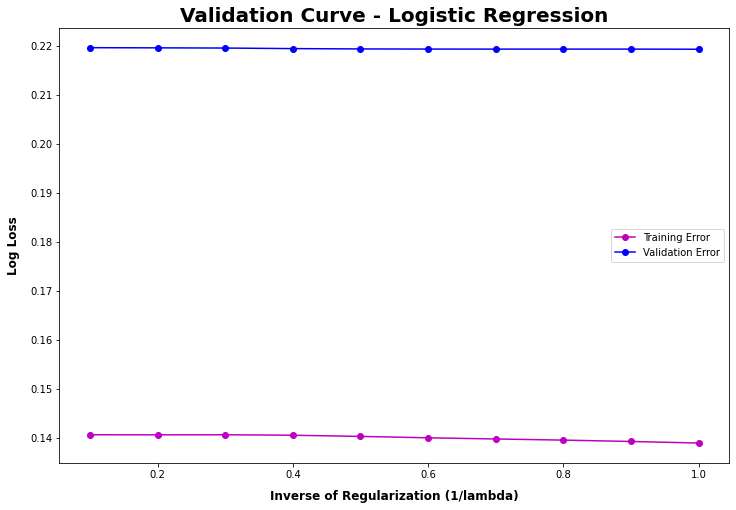

In [ ]:
reg_range = np.arange(0,1.1,0.1)

train_param_LSVC, val_param_LSVC = validation_curve(clf_linearSVC_pipe, X_train, X_train_targetSentiment, param_name='clf_linearSVC__C', param_range=reg_range, cv=5, scoring='neg_log_loss', n_jobs=-1)

tpar_LSVC_mean = -np.mean(train_param_LSVC, axis=1)
vpar_LSVC_mean = -np.mean(val_param_LSVC, axis=1) 

plt.figure(figsize=(12,8))
plt.plot(reg_range, tpar_LSVC_mean, 'o-', color='m', label='Training Error')
plt.plot(reg_range, vpar_LSVC_mean, 'o-', color='b', label='Validation Error')  
plt.xlabel("Inverse of Regularization (1/lambda)", labelpad=10, weight='bold', size=12)
plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
plt.title("Validation Curve - Linear Support Vector Machine", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
plt.show()

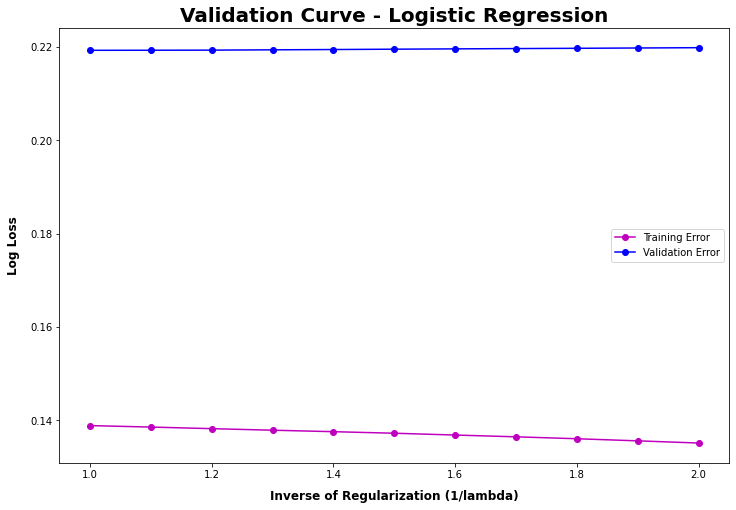

In [ ]:
reg_range = np.arange(1,2.1,0.1)

train_param_LSVC, val_param_LSVC = validation_curve(clf_linearSVC_pipe, X_train, X_train_targetSentiment, param_name='clf_linearSVC__C', param_range=reg_range, cv=5, scoring='neg_log_loss', n_jobs=-1)

tpar_LSVC_mean = -np.mean(train_param_LSVC, axis=1)
vpar_LSVC_mean = -np.mean(val_param_LSVC, axis=1) 

plt.figure(figsize=(12,8))
plt.plot(reg_range, tpar_LSVC_mean, 'o-', color='m', label='Training Error')
plt.plot(reg_range, vpar_LSVC_mean, 'o-', color='b', label='Validation Error')  
plt.xlabel("Inverse of Regularization (1/lambda)", labelpad=10, weight='bold', size=12)
plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
plt.title("Validation Curve - Linear Support Vector Machine", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
plt.show()

Plotting learning curves, to observe model performance as a function of number of samples

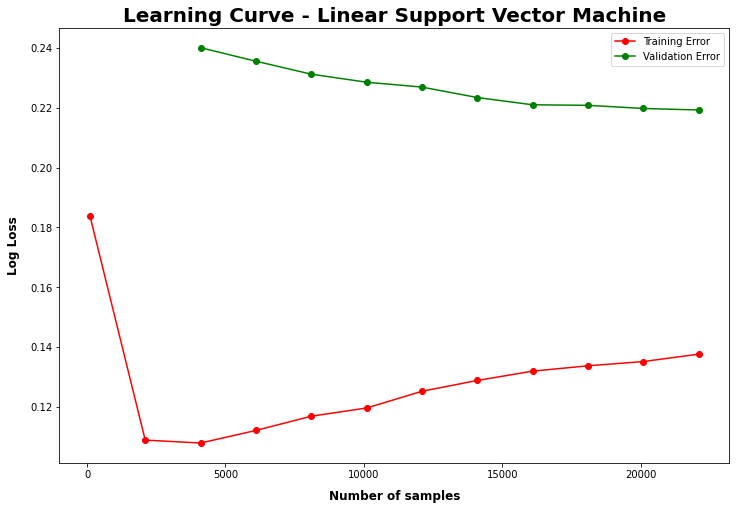

In [ ]:
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_linearSVC", SVC(C=1, kernel='linear', probability=True, random_state=42))])

train_sizes = np.arange(100, 4*len(X_train_targetSentiment)//5, 2000)
#train_sizes = np.arange(100, 2100, 250)

train_sizes_LSVC, train_score_LSVC, val_score_LSVC = learning_curve(clf_linearSVC_pipe, X_train, X_train_targetSentiment, train_sizes = train_sizes, cv=5, scoring='neg_log_loss', n_jobs=-1, shuffle=True, random_state=42)

tsc_LSVC_mean = -np.mean(train_score_LSVC, axis=1)
vsc_LSVC_mean = -np.mean(val_score_LSVC, axis=1)

plt.figure(figsize=(12,8))
plt.plot(train_sizes_LSVC, tsc_LSVC_mean, 'o-', color='r', label="Training Error")
plt.plot(train_sizes_LSVC, vsc_LSVC_mean, 'o-', color='g', label="Validation Error")
plt.xlabel("Number of samples", labelpad=10, weight='bold', size=12)
plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
plt.title("Learning Curve - Linear Support Vector Machine", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
#plt.ylim(0.92,0.96)
plt.show()

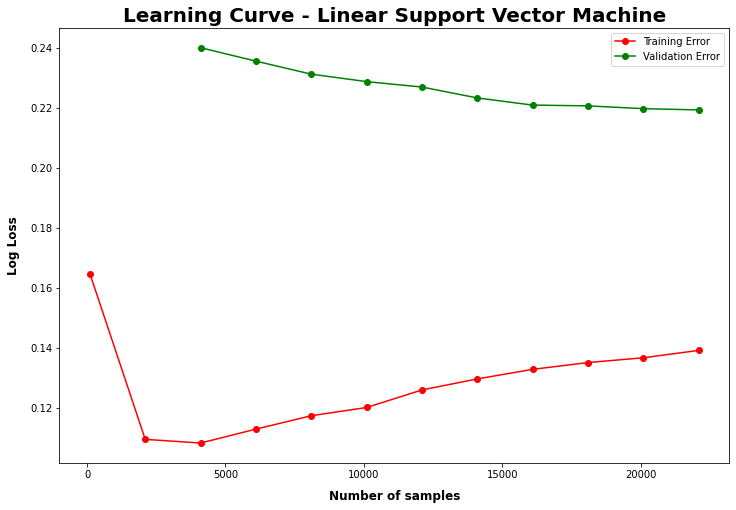

In [ ]:
# clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_linearSVC", SVC(C=0.4, kernel='linear', probability=True, random_state=42))])

# train_sizes = np.arange(100, 4*len(X_train_targetSentiment)//5, 2000)
# #train_sizes = np.arange(100, 2100, 250)

# train_sizes_LSVC, train_score_LSVC, val_score_LSVC = learning_curve(clf_linearSVC_pipe, X_train, X_train_targetSentiment, train_sizes = train_sizes, cv=5, scoring='neg_log_loss', n_jobs=-1, shuffle=True, random_state=42)

# tsc_LSVC_mean = -np.mean(train_score_LSVC, axis=1)
# vsc_LSVC_mean = -np.mean(val_score_LSVC, axis=1)

# plt.figure(figsize=(12,8))
# plt.plot(train_sizes_LSVC, tsc_LSVC_mean, 'o-', color='r', label="Training Error")
# plt.plot(train_sizes_LSVC, vsc_LSVC_mean, 'o-', color='g', label="Validation Error")
# plt.xlabel("Number of samples", labelpad=10, weight='bold', size=12)
# plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
# plt.title("Learning Curve - Linear Support Vector Machine", weight='bold', size=20)
# plt.legend(loc="best", fontsize='medium')
# #plt.ylim(0.92,0.96)
# plt.show()

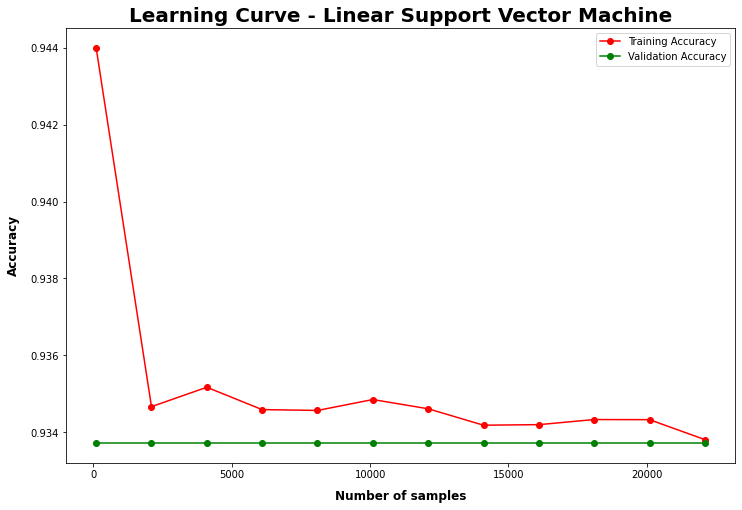

In [ ]:
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_linearSVC", SVC(C=1, kernel='linear', probability=True, random_state=42))])

train_sizes = np.arange(100, 4*len(X_train_targetSentiment)//5, 2000)
#train_sizes = np.arange(1, 1100, 100)

train_sizes_LSVC, train_score_LSVC, val_score_LSVC = learning_curve(clf_linearSVC_pipe, X_train, X_train_targetSentiment, train_sizes = train_sizes, cv=5, scoring='accuracy', n_jobs=-1, shuffle=True, random_state=42)

tsc_LSVC_mean = np.mean(train_score_LSVC, axis=1)
vsc_LSVC_mean = np.mean(val_score_LSVC, axis=1)

plt.figure(figsize=(12,8))
plt.plot(train_sizes_LSVC, tsc_LSVC_mean, 'o-', color='r', label="Training Accuracy")
plt.plot(train_sizes_LSVC, vsc_LSVC_mean, 'o-', color='g', label="Validation Accuracy")
plt.xlabel("Number of samples", labelpad=10, weight='bold', size=12)
plt.ylabel("Accuracy", labelpad=10, weight='bold', size=12)
plt.title("Learning Curve - Linear Support Vector Machine", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
#plt.ylim(0.92,0.96)
plt.show()

In [78]:
# clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_linearSVC", SVC(C=0.4, kernel='linear', probability=True, random_state=42))])
# clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

# predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
# pLSVC = label_binarize(predictedLinearSVC, classes=["Positive", "Neutral", "Negative"])

# #print(predictedLinearSVC[:5])
# print(np.mean(predictedLinearSVC == X_test_targetSentiment))
# print("\nAccuracy: " , sklearn.metrics.accuracy_score(y_test, pLSVC))
# print("\nConfusion Matrix: \n" , sklearn.metrics.multilabel_confusion_matrix(y_test, pLSVC))
# print("\nF1 Score: " , sklearn.metrics.f1_score(y_test, pLSVC, average=None))
# print("\nAvg F1 Score: ", np.mean(sklearn.metrics.f1_score(y_test, pLSVC, average=None)))
# print("\nPrecision Score: " , sklearn.metrics.precision_score(y_test, pLSVC, average=None))
# print("\nAvg Precision Score: " , np.mean(sklearn.metrics.precision_score(y_test, pLSVC, average=None)))
# print("\nRecall Score: " , sklearn.metrics.recall_score(y_test, pLSVC, average=None))
# print("\nAvg Recall Score: " , np.mean(sklearn.metrics.recall_score(y_test, pLSVC, average=None)))
# print("\nLog Loss: " , sklearn.metrics.log_loss(y_test, pLSVC))
# print("\nClassification Report: \n", sklearn.metrics.classification_report(y_test, pLSVC, target_names=['Positive', 'Neutral', 'Negative']))

0.9289633265954375

Accuracy:  0.9289633265954375

Confusion Matrix: 
 [[[   0  492]
  [   0 6434]]

 [[6603    0]
  [ 323    0]]

 [[6763    0]
  [ 163    0]]]

F1 Score:  [0.96317365 0.         0.        ]

Avg F1 Score:  0.32105788423153697

Precision Score:  [0.92896333 0.         0.        ]

Avg Precision Score:  0.30965444219847915

Recall Score:  [1. 0. 0.]

Avg Recall Score:  0.3333333333333333

Log Loss:  2.4235988056492346

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.93      1.00      0.96      6434
     Neutral       0.00      0.00      0.00       323
    Negative       0.00      0.00      0.00       163

   micro avg       0.93      0.93      0.93      6920
   macro avg       0.31      0.33      0.32      6920
weighted avg       0.86      0.93      0.90      6920
 samples avg       0.93      0.93      0.93      6920



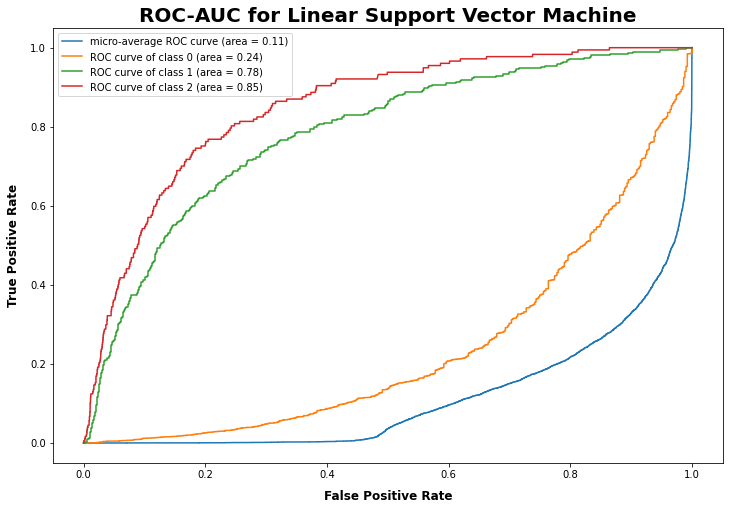

In [ ]:
# # clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_linearSVC", SVC(C=0.4, kernel='linear', probability=True, random_state=42))])
# # clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

# probLSVC = clf_linearSVC_pipe.predict_proba(X_test)
# #probLSVC = clf_linearSVC_pipe.decision_function(X_test)
# #print(probLLSVC[:5])

# fprLSVC, tprLSVC, roc_aucLSVC = dict(), dict(), dict()
# n_classes = y_train.shape[1]

# for i in range(n_classes):
#     fprLSVC[i], tprLSVC[i], _ = sklearn.metrics.roc_curve(y_test[:, i], probLSVC[:, i])
#     roc_aucLSVC[i] = sklearn.metrics.auc(fprLSVC[i], tprLSVC[i])

# fprLSVC["micro"], tprLSVC["micro"], _ = sklearn.metrics.roc_curve(y_test.ravel(), probLSVC[:,1:].ravel())
# roc_aucLSVC["micro"] = sklearn.metrics.auc(fprLSVC["micro"], tprLSVC["micro"])

# plt.figure(figsize=(12,8))
# plt.plot(fprLSVC["micro"], tprLSVC["micro"], label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_aucLSVC["micro"]))

# #plt.plot(fprLSVC[0], tprLSVC[0], label='ROC curve of class \"Positive\" (area = {1:0.2f})'''.format(roc_aucLSVC[1]))
# for i in range(n_classes):
#     plt.plot(fprLSVC[i], tprLSVC[i], label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_aucLSVC[i]))

# plt.xlabel('False Positive Rate', labelpad=10, weight='bold', size=12)
# plt.ylabel('True Positive Rate', labelpad=10, weight='bold', size=12)
# plt.title('ROC-AUC for Linear Support Vector Machine', weight='bold', size=20)
# plt.legend(loc="best")
# plt.show()

Evaluating performance on the test set

In [76]:
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_linearSVC", SVC(C=1, kernel='linear', probability=True, random_state=42))])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
pLSVC = label_binarize(predictedLinearSVC, classes=["Positive", "Neutral", "Negative"])

#print(predictedLinearSVC[:5])
print(np.mean(predictedLinearSVC == X_test_targetSentiment))
print("\nAccuracy: " , sklearn.metrics.accuracy_score(y_test, pLSVC))
print("\nConfusion Matrix: \n" , sklearn.metrics.multilabel_confusion_matrix(y_test, pLSVC))
print("\nF1 Score: " , sklearn.metrics.f1_score(y_test, pLSVC, average=None))
print("\nAvg F1 Score: ", np.mean(sklearn.metrics.f1_score(y_test, pLSVC, average=None)))
print("\nPrecision Score: " , sklearn.metrics.precision_score(y_test, pLSVC, average=None))
print("\nAvg Precision Score: " , np.mean(sklearn.metrics.precision_score(y_test, pLSVC, average=None)))
print("\nRecall Score: " , sklearn.metrics.recall_score(y_test, pLSVC, average=None))
print("\nAvg Recall Score: " , np.mean(sklearn.metrics.recall_score(y_test, pLSVC, average=None)))
print("\nLog Loss: " , sklearn.metrics.log_loss(y_test, pLSVC))
print("\nClassification Report: \n", sklearn.metrics.classification_report(y_test, pLSVC, target_names=['Positive', 'Neutral', 'Negative']))

0.9309846953508518

Accuracy:  0.9309846953508518

Confusion Matrix: 
 [[[  24  468]
  [   6 6428]]

 [[6600    3]
  [ 322    1]]

 [[6756    7]
  [ 144   19]]]

F1 Score:  [0.96444111 0.00611621 0.2010582 ]

Avg F1 Score:  0.3905385064289469

Precision Score:  [0.93213457 0.25       0.73076923]

Avg Precision Score:  0.6376346005116308

Recall Score:  [0.99906745 0.00309598 0.11656442]

Avg Recall Score:  0.3729092821866471

Log Loss:  2.3537832021943186

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.93      1.00      0.96      6434
     Neutral       0.25      0.00      0.01       323
    Negative       0.73      0.12      0.20       163

   micro avg       0.93      0.93      0.93      6920
   macro avg       0.64      0.37      0.39      6920
weighted avg       0.90      0.93      0.90      6920
 samples avg       0.93      0.93      0.93      6920



Plotting ROC curves

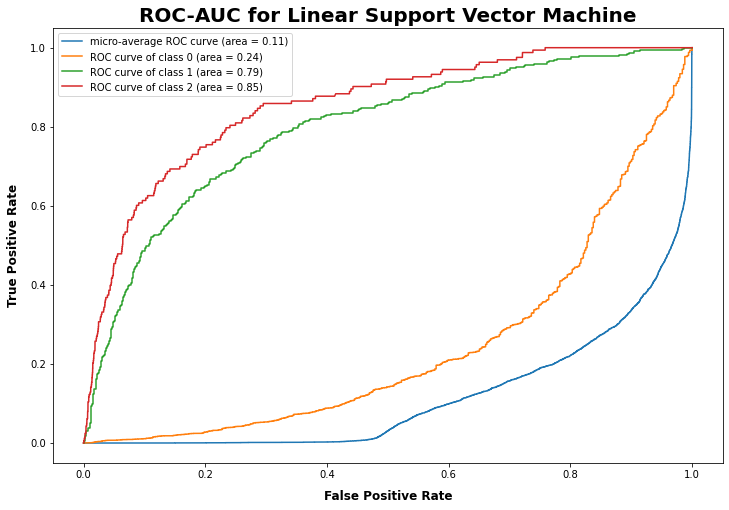

In [77]:
# clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_linearSVC", SVC(C=1, kernel='linear', probability=True, random_state=42))])
# clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

probLSVC = clf_linearSVC_pipe.predict_proba(X_test)
#probLSVC = clf_linearSVC_pipe.decision_function(X_test)
#print(probLLSVC[:5])

fprLSVC, tprLSVC, roc_aucLSVC = dict(), dict(), dict()
n_classes = y_train.shape[1]

for i in range(n_classes):
    fprLSVC[i], tprLSVC[i], _ = sklearn.metrics.roc_curve(y_test[:, i], probLSVC[:, i])
    roc_aucLSVC[i] = sklearn.metrics.auc(fprLSVC[i], tprLSVC[i])

fprLSVC["micro"], tprLSVC["micro"], _ = sklearn.metrics.roc_curve(y_test.ravel(), probLSVC[:,1:].ravel())
roc_aucLSVC["micro"] = sklearn.metrics.auc(fprLSVC["micro"], tprLSVC["micro"])

plt.figure(figsize=(12,8))
plt.plot(fprLSVC["micro"], tprLSVC["micro"], label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_aucLSVC["micro"]))

#plt.plot(fprLSVC[0], tprLSVC[0], label='ROC curve of class \"Positive\" (area = {1:0.2f})'''.format(roc_aucLSVC[1]))
for i in range(n_classes):
    plt.plot(fprLSVC[i], tprLSVC[i], label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_aucLSVC[i]))

plt.xlabel('False Positive Rate', labelpad=10, weight='bold', size=12)
plt.ylabel('True Positive Rate', labelpad=10, weight='bold', size=12)
plt.title('ROC-AUC for Linear Support Vector Machine', weight='bold', size=20)
plt.legend(loc="best")
plt.show()

## K-Nearest Neighbours Classifier

Building the pipeline

In [62]:
clf_KNN_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_KNN", KNeighborsClassifier(n_jobs=-1))])
#clf_KNN_pipe.fit(X_train, X_train_targetSentiment)

Tuning the hyperparameters

Finding optimal number of neighbours

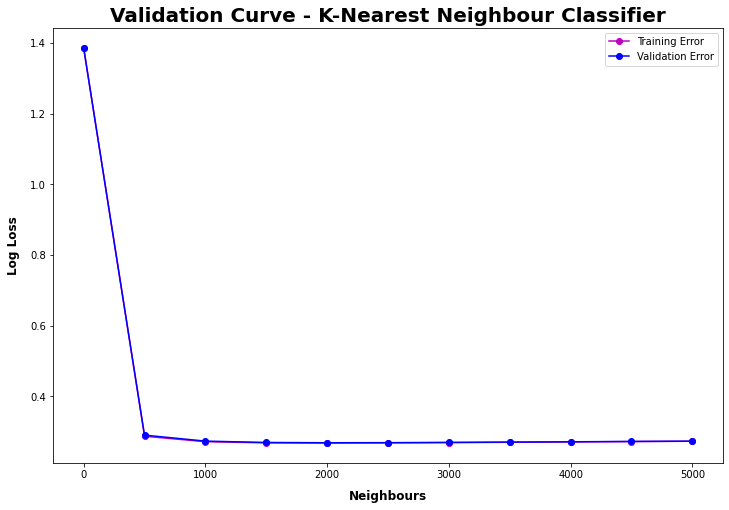

In [63]:
neighbours = np.arange(0,5500,500)

train_param_KNN, val_param_KNN = validation_curve(clf_KNN_pipe, X_train, X_train_targetSentiment, param_name='clf_KNN__n_neighbors', param_range=neighbours, cv=5, scoring='neg_log_loss', n_jobs=-1)

tpar_KNN_mean = -np.mean(train_param_KNN, axis=1)
vpar_KNN_mean = -np.mean(val_param_KNN, axis=1) 

plt.figure(figsize=(12,8))
plt.plot(neighbours, tpar_KNN_mean, 'o-', color='m', label='Training Error')
plt.plot(neighbours, vpar_KNN_mean, 'o-', color='b', label='Validation Error')  
plt.xlabel("Neighbours", labelpad=10, weight='bold', size=12)
plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
plt.title("Validation Curve - K-Nearest Neighbour Classifier", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
plt.show()

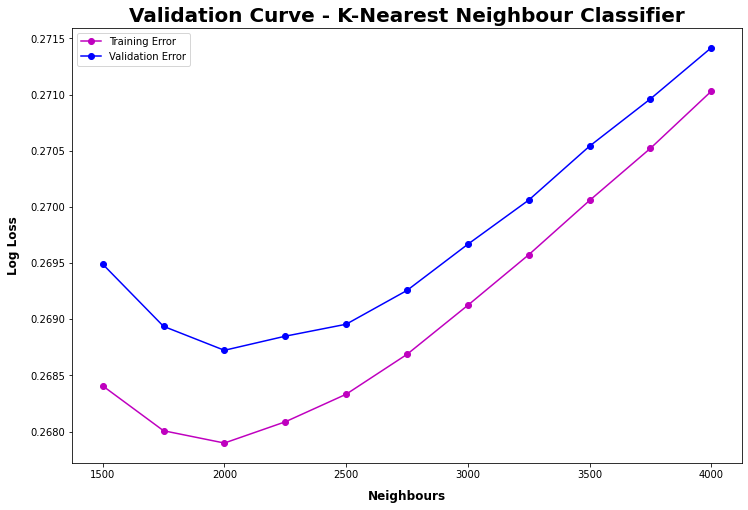

In [64]:
neighbours = np.arange(1500,4250,250)

train_param_KNN, val_param_KNN = validation_curve(clf_KNN_pipe, X_train, X_train_targetSentiment, param_name='clf_KNN__n_neighbors', param_range=neighbours, cv=5, scoring='neg_log_loss', n_jobs=-1)

tpar_KNN_mean = -np.mean(train_param_KNN, axis=1)
vpar_KNN_mean = -np.mean(val_param_KNN, axis=1) 

plt.figure(figsize=(12,8))
plt.plot(neighbours, tpar_KNN_mean, 'o-', color='m', label='Training Error')
plt.plot(neighbours, vpar_KNN_mean, 'o-', color='b', label='Validation Error')  
plt.xlabel("Neighbours", labelpad=10, weight='bold', size=12)
plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
plt.title("Validation Curve - K-Nearest Neighbour Classifier", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
plt.show()

In [ ]:
# clf_KNN_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_KNN", KNeighborsClassifier(n_neighbors=, n_jobs=-1))])

# train_param_KNN, val_param_KNN = validation_curve(clf_KNN_pipe, X_train, X_train_targetSentiment, param_name='clf_KNN__n_neighbors', param_range=neighbours, cv=5, scoring='neg_log_loss', n_jobs=-1)

# tpar_KNN_mean = -np.mean(train_param_KNN, axis=1)
# vpar_KNN_mean = -np.mean(val_param_KNN, axis=1) 

# plt.figure(figsize=(12,8))
# plt.plot(neighbours, tpar_KNN_mean, 'o-', color='m', label='Training Error')
# plt.plot(neighbours, vpar_KNN_mean, 'o-', color='b', label='Validation Error')  
# plt.xlabel("Neighbours", labelpad=10, weight='bold', size=12)
# plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
# plt.title("Validation Curve - K-Nearest Neighbour Classifier", weight='bold', size=20)
# plt.legend(loc="best", fontsize='medium')
# plt.show()

Plotting learning curves, to observe model performance as a function of number of samples

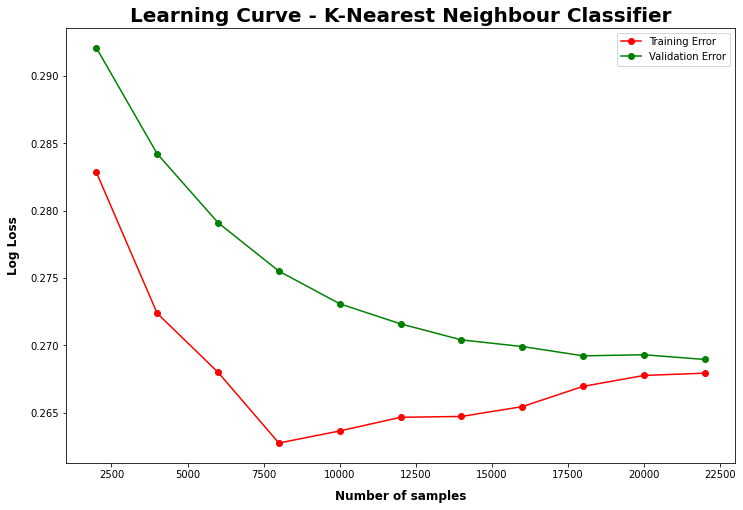

In [27]:
clf_KNN_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_KNN", KNeighborsClassifier(n_neighbors=2000, n_jobs=-1))])
#clf_KNN_pipe.fit(X_train, X_train_targetSentiment)

train_sizes = np.arange(1, 4*len(X_train_targetSentiment)//5, 2000)

train_sizes_KNN, train_score_KNN, val_score_KNN = learning_curve(clf_KNN_pipe, X_train, X_train_targetSentiment, train_sizes = train_sizes, cv=5, scoring='neg_log_loss', n_jobs=-1, shuffle=True, random_state=42)

tsc_KNN_mean = -np.mean(train_score_KNN, axis=1)
vsc_KNN_mean = -np.mean(val_score_KNN, axis=1)

plt.figure(figsize=(12,8))
plt.plot(train_sizes_KNN, tsc_KNN_mean, 'o-', color='r', label="Training Error")
plt.plot(train_sizes_KNN, vsc_KNN_mean, 'o-', color='g', label="Validation Error")
plt.xlabel("Number of samples", labelpad=10, weight='bold', size=12)
plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
plt.title("Learning Curve - K-Nearest Neighbour Classifier", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
#plt.ylim(0.92,0.96)
plt.show()

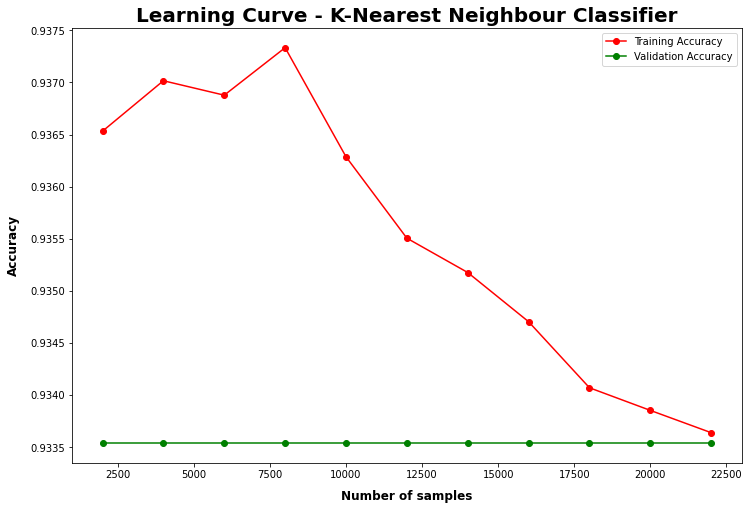

In [28]:
clf_KNN_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_KNN", KNeighborsClassifier(n_neighbors=2000, n_jobs=-1))])
#clf_KNN_pipe.fit(X_train, X_train_targetSentiment)

train_sizes = np.arange(1, 4*len(X_train_targetSentiment)//5, 2000)

train_sizes_KNN, train_score_KNN, val_score_KNN = learning_curve(clf_KNN_pipe, X_train, X_train_targetSentiment, train_sizes = train_sizes, cv=5, scoring='accuracy', n_jobs=-1, shuffle=True, random_state=42)

tsc_KNN_mean = np.mean(train_score_KNN, axis=1)
vsc_KNN_mean = np.mean(val_score_KNN, axis=1)

plt.figure(figsize=(12,8))
plt.plot(train_sizes_KNN, tsc_KNN_mean, 'o-', color='r', label="Training Accuracy")
plt.plot(train_sizes_KNN, vsc_KNN_mean, 'o-', color='g', label="Validation Accuracy")
plt.xlabel("Number of samples", labelpad=10, weight='bold', size=12)
plt.ylabel("Accuracy", labelpad=10, weight='bold', size=12)
plt.title("Learning Curve - K-Nearest Neighbour Classifier", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
#plt.ylim(0.92,0.96)
plt.show()

Evaluating performance on the test set

In [68]:
clf_KNN_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_KNN", KNeighborsClassifier(n_neighbors=2000, n_jobs=-1))])
clf_KNN_pipe.fit(X_train, X_train_targetSentiment)

predictedKNN = clf_KNN_pipe.predict(X_test)
pKNN = label_binarize(predictedKNN, classes=["Positive", "Neutral", "Negative"])

print(np.mean(predictedKNN == X_test_targetSentiment))
print("\nAccuracy: " , sklearn.metrics.accuracy_score(y_test, pKNN))
print("\nConfusion Matrix: \n" , sklearn.metrics.multilabel_confusion_matrix(y_test, pKNN))
print("\nF1 Score: " , sklearn.metrics.f1_score(y_test, pKNN, average=None))
print("\nAvg F1 Score: ", np.mean(sklearn.metrics.f1_score(y_test, pKNN, average=None)))
print("\nPrecision Score: " , sklearn.metrics.precision_score(y_test, pKNN, average=None))
print("\nAvg Precision Score: " , np.mean(sklearn.metrics.precision_score(y_test, pKNN, average=None)))
print("\nRecall Score: " , sklearn.metrics.recall_score(y_test, pKNN, average=None))
print("\nAvg Recall Score: " , np.mean(sklearn.metrics.recall_score(y_test, pKNN, average=None)))
print("\nLog Loss: " , sklearn.metrics.log_loss(y_test, pKNN))
print("\nClassification Report: \n", sklearn.metrics.classification_report(y_test, pKNN, target_names=['Positive', 'Neutral', 'Negative']))

0.9289633265954375

Accuracy:  0.9289633265954375

Confusion Matrix: 
 [[[   0  492]
  [   0 6434]]

 [[6603    0]
  [ 323    0]]

 [[6763    0]
  [ 163    0]]]

F1 Score:  [0.96317365 0.         0.        ]

Avg F1 Score:  0.32105788423153697

Precision Score:  [0.92896333 0.         0.        ]

Avg Precision Score:  0.30965444219847915

Recall Score:  [1. 0. 0.]

Avg Recall Score:  0.3333333333333333

Log Loss:  2.4235988056492346

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.93      1.00      0.96      6434
     Neutral       0.00      0.00      0.00       323
    Negative       0.00      0.00      0.00       163

   micro avg       0.93      0.93      0.93      6920
   macro avg       0.31      0.33      0.32      6920
weighted avg       0.86      0.93      0.90      6920
 samples avg       0.93      0.93      0.93      6920



Plotting ROC Curves

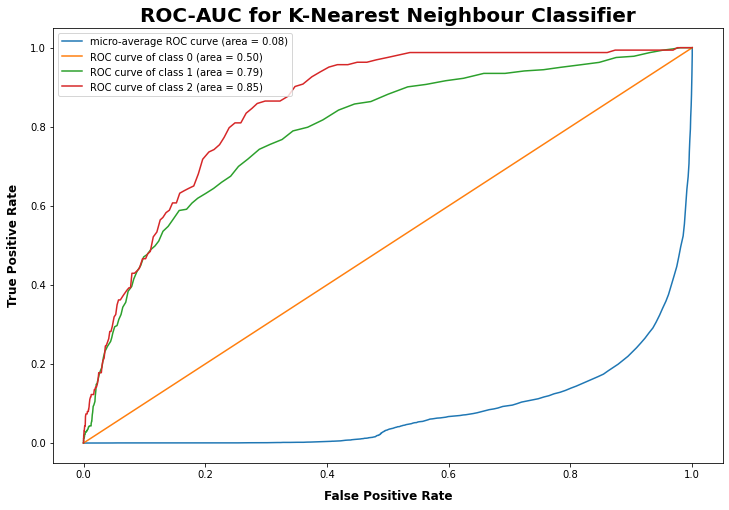

In [69]:
# clf_KNN_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_KNN", KNeighborsClassifier(n_neighbors=2000, n_jobs=-1))])
# clf_KNN_pipe.fit(X_train, X_train_targetSentiment)

probKNN = clf_KNN_pipe.predict_proba(X_test)
#probKNN = clf_KNN_pipe.decision_function(X_test)
#print(probKNN.shape)

fprKNN, tprKNN, roc_aucKNN = dict(), dict(), dict()
n_classes = y_train.shape[1]

for i in range(n_classes):
    fprKNN[i], tprKNN[i], _ = sklearn.metrics.roc_curve(y_test[:, i], probKNN[:, i])
    roc_aucKNN[i] = sklearn.metrics.auc(fprKNN[i], tprKNN[i])

fprKNN["micro"], tprKNN["micro"], _ = sklearn.metrics.roc_curve(y_test.ravel(), probKNN[:,1:].ravel())
roc_aucKNN["micro"] = sklearn.metrics.auc(fprKNN["micro"], tprKNN["micro"])

plt.figure(figsize=(12,8))
plt.plot(fprKNN["micro"], tprKNN["micro"], label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_aucKNN["micro"]))

#plt.plot(fprKNN[0], tprKNN[0], label='ROC curve of class \"Positive\" (area = {1:0.2f})'''.format(roc_aucKNN[1]))
for i in range(n_classes):
    plt.plot(fprKNN[i], tprKNN[i], label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_aucKNN[i]))

plt.xlabel('False Positive Rate', labelpad=10, weight='bold', size=12)
plt.ylabel('True Positive Rate', labelpad=10, weight='bold', size=12)
plt.title('ROC-AUC for K-Nearest Neighbour Classifier', weight='bold', size=20)
plt.legend(loc="best")
plt.show()

##Neural Network

Building the Pipeline

In [70]:
clf_Neural_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_Neural", MLPClassifier(shuffle=True, random_state=42, early_stopping=True))])
#clf_Neural_pipe.fit(X_train, X_train_targetSentiment)

Tuning Hyperparameters

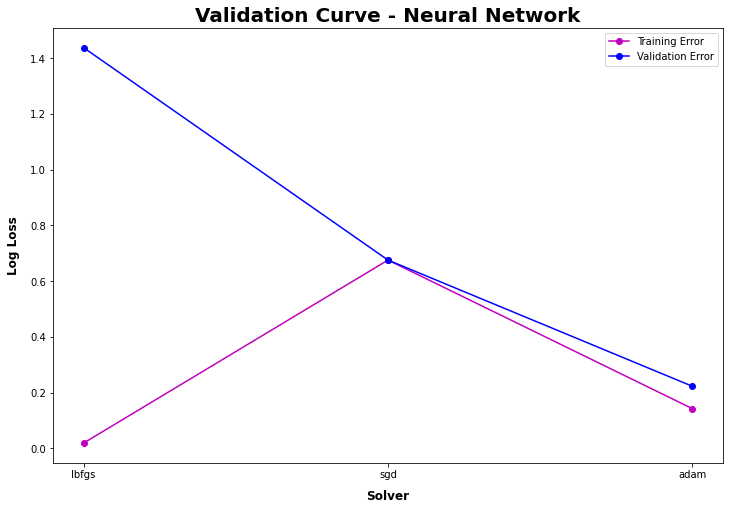

In [37]:
solver = ['lbfgs','sgd','adam']

train_param_Neural, val_param_Neural = validation_curve(clf_Neural_pipe, X_train, X_train_targetSentiment, param_name='clf_Neural__solver', param_range=solver, cv=5, scoring='neg_log_loss', n_jobs=-1)

tpar_Neural_mean = -np.mean(train_param_Neural, axis=1)
vpar_Neural_mean = -np.mean(val_param_Neural, axis=1) 

plt.figure(figsize=(12,8))
plt.plot(solver, tpar_Neural_mean, 'o-', color='m', label='Training Error')
plt.plot(solver, vpar_Neural_mean, 'o-', color='b', label='Validation Error')  
plt.xlabel("Solver", labelpad=10, weight='bold', size=12)
plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
plt.title("Validation Curve - Neural Network", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
plt.show()

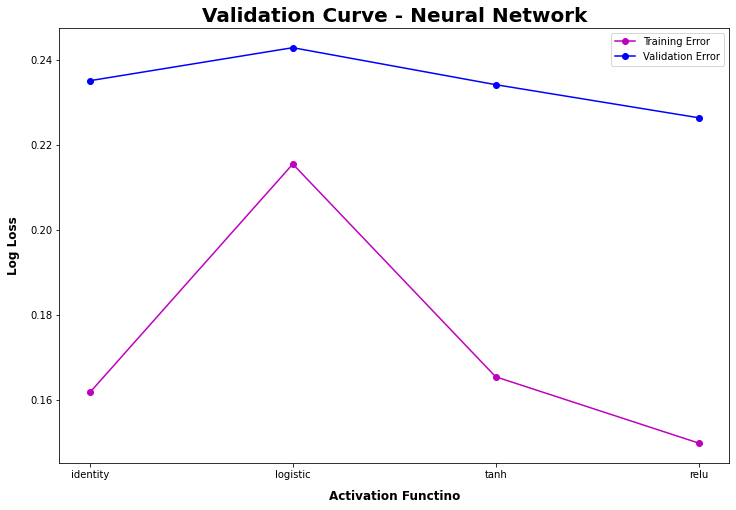

In [38]:
clf_Neural_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_Neural", MLPClassifier(solver='adam', shuffle=True, random_state=42, tol=0.001, early_stopping=True, validation_fraction=0.2))])
#clf_Neural_pipe.fit(X_train, X_train_targetSentiment)

activation = ['identity', 'logistic', 'tanh', 'relu']

train_param_Neural, val_param_Neural = validation_curve(clf_Neural_pipe, X_train, X_train_targetSentiment, param_name='clf_Neural__activation', param_range=activation, cv=5, scoring='neg_log_loss', n_jobs=-1)

tpar_Neural_mean = -np.mean(train_param_Neural, axis=1)
vpar_Neural_mean = -np.mean(val_param_Neural, axis=1) 

plt.figure(figsize=(12,8))
plt.plot(activation, tpar_Neural_mean, 'o-', color='m', label='Training Error')
plt.plot(activation, vpar_Neural_mean, 'o-', color='b', label='Validation Error')  
plt.xlabel("Activation Function", labelpad=10, weight='bold', size=12)
plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
plt.title("Validation Curve - Neural Network", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
plt.show()

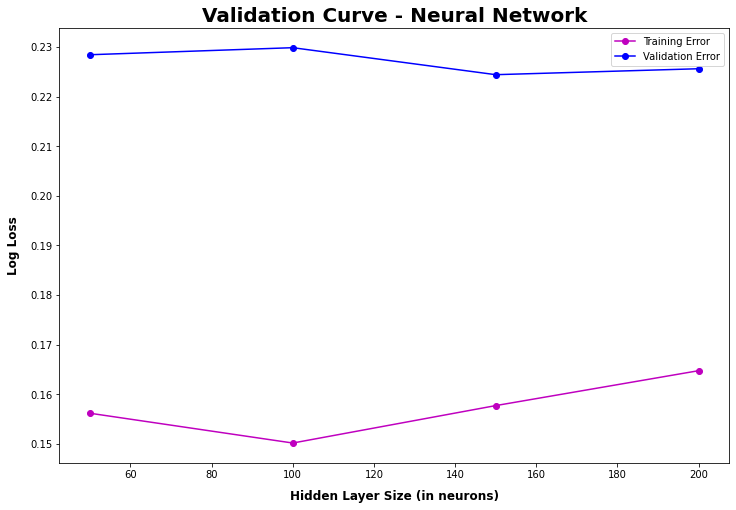

In [27]:
clf_Neural_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_Neural", MLPClassifier(solver='adam', shuffle=True, random_state=42, tol=0.001, early_stopping=True, validation_fraction=0.2))])
#clf_Neural_pipe.fit(X_train, X_train_targetSentiment)

# hidden = np.arange(50,250,50)
hidden = [(50,),(100,),(150,),(200,)]

train_param_Neural, val_param_Neural = validation_curve(clf_Neural_pipe, X_train, X_train_targetSentiment, param_name='clf_Neural__hidden_layer_sizes', param_range=hidden, cv=5, scoring='neg_log_loss', n_jobs=-1)

tpar_Neural_mean = -np.mean(train_param_Neural, axis=1)
vpar_Neural_mean = -np.mean(val_param_Neural, axis=1) 

plt.figure(figsize=(12,8))
plt.plot(hidden, tpar_Neural_mean, 'o-', color='m', label='Training Error')
plt.plot(hidden, vpar_Neural_mean, 'o-', color='b', label='Validation Error')  
plt.xlabel("Hidden Layer Size (in neurons)", labelpad=10, weight='bold', size=12)
plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
plt.title("Validation Curve - Neural Network", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
plt.show()

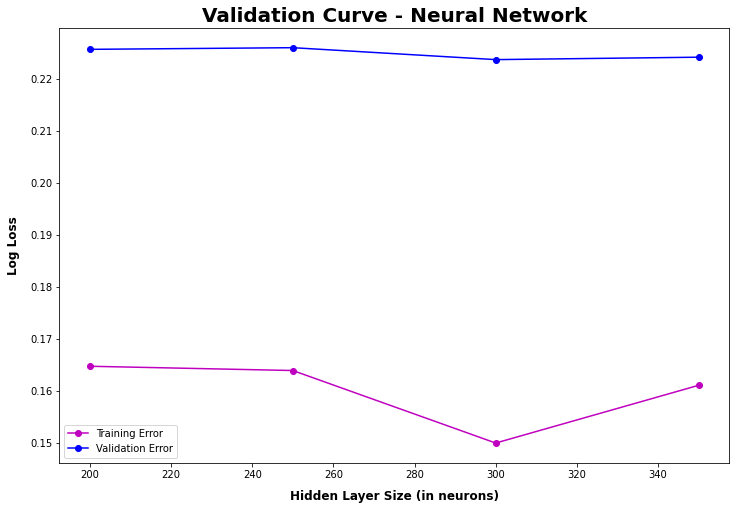

In [28]:
# clf_Neural_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_Neural", MLPClassifier(solver='adam', shuffle=True, random_state=42, tol=0.001, early_stopping=True, validation_fraction=0.2))])
# #clf_Neural_pipe.fit(X_train, X_train_targetSentiment)

# # hidden = np.arange(50,250,50)
# hidden = [(200,),(250,),(300,),(350,)]

# train_param_Neural, val_param_Neural = validation_curve(clf_Neural_pipe, X_train, X_train_targetSentiment, param_name='clf_Neural__hidden_layer_sizes', param_range=hidden, cv=5, scoring='neg_log_loss', n_jobs=-1)

# tpar_Neural_mean = -np.mean(train_param_Neural, axis=1)
# vpar_Neural_mean = -np.mean(val_param_Neural, axis=1) 

# plt.figure(figsize=(12,8))
# plt.plot(hidden, tpar_Neural_mean, 'o-', color='m', label='Training Error')
# plt.plot(hidden, vpar_Neural_mean, 'o-', color='b', label='Validation Error')  
# plt.xlabel("Hidden Layer Size (in neurons)", labelpad=10, weight='bold', size=12)
# plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
# plt.title("Validation Curve - Neural Network", weight='bold', size=20)
# plt.legend(loc="best", fontsize='medium')
# plt.show()

Plotting learning curves, to observe model performance as a function of number of samples

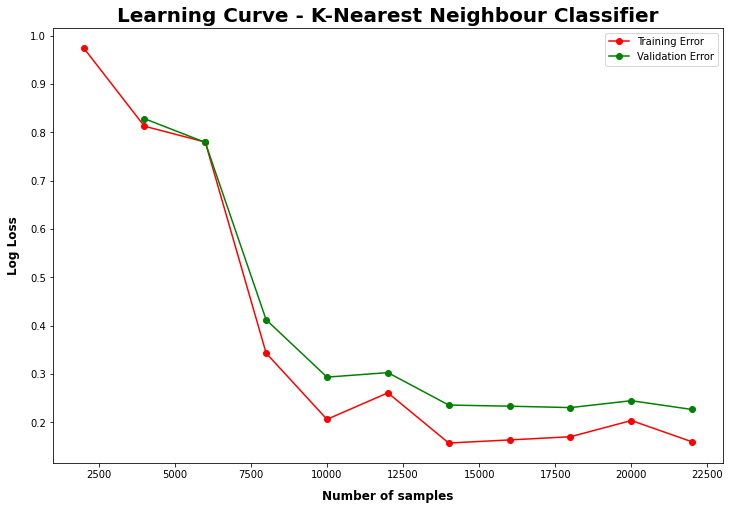

In [29]:
clf_Neural_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_Neural", MLPClassifier(hidden_layer_sizes=(150,), activation='relu', solver='adam', shuffle=True, random_state=42, tol=0.001, early_stopping=True, validation_fraction=0.2))])
#clf_Neural_pipe.fit(X_train, X_train_targetSentiment)

train_sizes = np.arange(1, 4*len(X_train_targetSentiment)//5, 2000)

train_sizes_Neural, train_score_Neural, val_score_Neural = learning_curve(clf_Neural_pipe, X_train, X_train_targetSentiment, train_sizes = train_sizes, cv=5, scoring='neg_log_loss', n_jobs=-1, shuffle=True, random_state=42)

tsc_Neural_mean = -np.mean(train_score_Neural, axis=1)
vsc_Neural_mean = -np.mean(val_score_Neural, axis=1)

plt.figure(figsize=(12,8))
plt.plot(train_sizes_Neural, tsc_Neural_mean, 'o-', color='r', label="Training Error")
plt.plot(train_sizes_Neural, vsc_Neural_mean, 'o-', color='g', label="Validation Error")
plt.xlabel("Number of samples", labelpad=10, weight='bold', size=12)
plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
plt.title("Learning Curve - Neural Network", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
#plt.ylim(0.92,0.96)
plt.show()

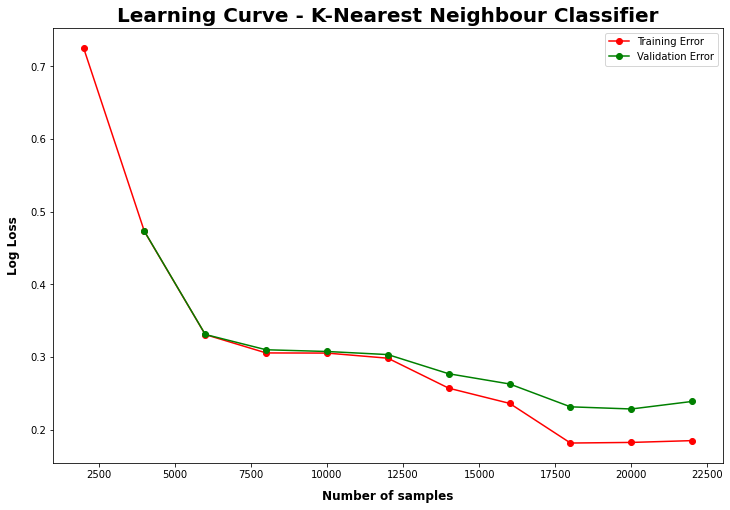

In [30]:
clf_Neural_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_Neural", MLPClassifier(hidden_layer_sizes=(150,), activation='logistic', solver='adam', shuffle=True, random_state=42, tol=0.001, early_stopping=True, validation_fraction=0.2))])
#clf_Neural_pipe.fit(X_train, X_train_targetSentiment)

train_sizes = np.arange(1, 4*len(X_train_targetSentiment)//5, 2000)

train_sizes_Neural, train_score_Neural, val_score_Neural = learning_curve(clf_Neural_pipe, X_train, X_train_targetSentiment, train_sizes = train_sizes, cv=5, scoring='neg_log_loss', n_jobs=-1, shuffle=True, random_state=42)

tsc_Neural_mean = -np.mean(train_score_Neural, axis=1)
vsc_Neural_mean = -np.mean(val_score_Neural, axis=1)

plt.figure(figsize=(12,8))
plt.plot(train_sizes_Neural, tsc_Neural_mean, 'o-', color='r', label="Training Error")
plt.plot(train_sizes_Neural, vsc_Neural_mean, 'o-', color='g', label="Validation Error")
plt.xlabel("Number of samples", labelpad=10, weight='bold', size=12)
plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
plt.title("Learning Curve - Neural Network", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
#plt.ylim(0.92,0.96)
plt.show()

In [71]:
clf_Neural_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_Neural", MLPClassifier(hidden_layer_sizes=(150,), activation='relu', solver='adam', shuffle=True, random_state=42, tol=0.001, early_stopping=True, validation_fraction=0.2))])
clf_Neural_pipe.fit(X_train, X_train_targetSentiment)

predictedNeural = clf_Neural_pipe.predict(X_test)
pNeural = label_binarize(predictedNeural, classes=["Positive", "Neutral", "Negative"])

print(np.mean(predictedNeural == X_test_targetSentiment))
print("\nAccuracy: " , sklearn.metrics.accuracy_score(y_test, pNeural))
print("\nConfusion Matrix: \n" , sklearn.metrics.multilabel_confusion_matrix(y_test, pNeural))
print("\nF1 Score: " , sklearn.metrics.f1_score(y_test, pNeural, average=None))
print("\nAvg F1 Score: ", np.mean(sklearn.metrics.f1_score(y_test, pNeural, average=None)))
print("\nPrecision Score: " , sklearn.metrics.precision_score(y_test, pNeural, average=None))
print("\nAvg Precision Score: " , np.mean(sklearn.metrics.precision_score(y_test, pNeural, average=None)))
print("\nRecall Score: " , sklearn.metrics.recall_score(y_test, pNeural, average=None))
print("\nAvg Recall Score: " , np.mean(sklearn.metrics.recall_score(y_test, pNeural, average=None)))
print("\nLog Loss: " , sklearn.metrics.log_loss(y_test, pNeural))
print("\nClassification Report: \n", sklearn.metrics.classification_report(y_test, pNeural, target_names=['Positive', 'Neutral', 'Negative']))

0.9305515449032631

Accuracy:  0.9305515449032631

Confusion Matrix: 
 [[[  72  420]
  [  38 6396]]

 [[6558   45]
  [ 302   21]]

 [[6747   16]
  [ 135   28]]]

F1 Score:  [0.96543396 0.10796915 0.2705314 ]

Avg F1 Score:  0.4479781716337619

Precision Score:  [0.93838028 0.31818182 0.63636364]

Avg Precision Score:  0.6309752454118652

Recall Score:  [0.99409388 0.06501548 0.17177914]

Avg Recall Score:  0.4102961657542353

Log Loss:  2.3687436886489435

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.94      0.99      0.97      6434
     Neutral       0.32      0.07      0.11       323
    Negative       0.64      0.17      0.27       163

   micro avg       0.93      0.93      0.93      6920
   macro avg       0.63      0.41      0.45      6920
weighted avg       0.90      0.93      0.91      6920
 samples avg       0.93      0.93      0.93      6920



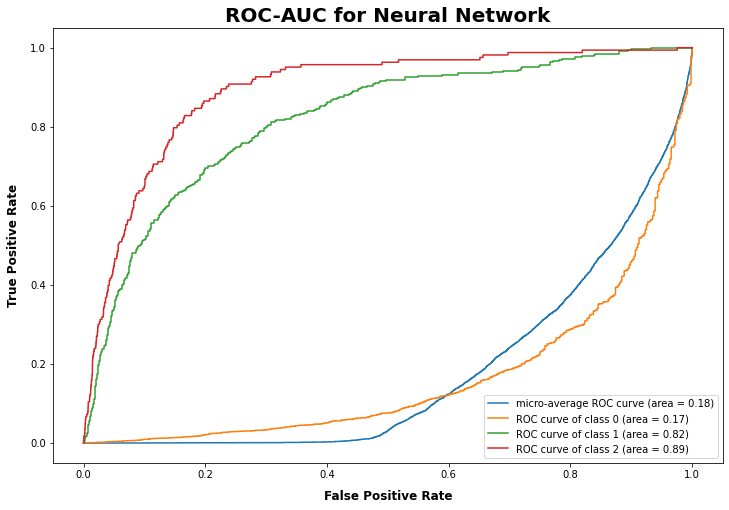

In [72]:
# clf_Neural_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_Neural", MLPClassifier(hidden_layer_sizes=(150,), activation='logistic', solver='adam', shuffle=True, random_state=42, tol=0.001, early_stopping=True, validation_fraction=0.2))])
# clf_Neural_pipe.fit(X_train, X_train_targetSentiment)

probNeural = clf_Neural_pipe.predict_proba(X_test)
#probNeural = clf_Neural_pipe.decision_function(X_test)
#print(probNeural.shape)

fprNeural, tprNeural, roc_aucNeural = dict(), dict(), dict()
n_classes = y_train.shape[1]

for i in range(n_classes):
    fprNeural[i], tprNeural[i], _ = sklearn.metrics.roc_curve(y_test[:, i], probNeural[:, i])
    roc_aucNeural[i] = sklearn.metrics.auc(fprNeural[i], tprNeural[i])

fprNeural["micro"], tprNeural["micro"], _ = sklearn.metrics.roc_curve(y_test.ravel(), probNeural[:,1:].ravel())
roc_aucNeural["micro"] = sklearn.metrics.auc(fprNeural["micro"], tprNeural["micro"])

plt.figure(figsize=(12,8))
plt.plot(fprNeural["micro"], tprNeural["micro"], label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_aucNeural["micro"]))

#plt.plot(fprNeural[0], tprNeural[0], label='ROC curve of class \"Positive\" (area = {1:0.2f})'''.format(roc_aucNeural[1]))
for i in range(n_classes):
    plt.plot(fprNeural[i], tprNeural[i], label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_aucNeural[i]))

plt.xlabel('False Positive Rate', labelpad=10, weight='bold', size=12)
plt.ylabel('True Positive Rate', labelpad=10, weight='bold', size=12)
plt.title('ROC-AUC for Neural Network', weight='bold', size=20)
plt.legend(loc="best")
plt.show()

Evaluating performance on the test set

In [73]:
clf_Neural_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_Neural", MLPClassifier(hidden_layer_sizes=(150,), activation='logistic', solver='adam', shuffle=True, random_state=42, tol=0.001, early_stopping=True, validation_fraction=0.2))])
clf_Neural_pipe.fit(X_train, X_train_targetSentiment)

predictedNeural = clf_Neural_pipe.predict(X_test)
pNeural = label_binarize(predictedNeural, classes=["Positive", "Neutral", "Negative"])

print(np.mean(predictedNeural == X_test_targetSentiment))
print("\nAccuracy: " , sklearn.metrics.accuracy_score(y_test, pNeural))
print("\nConfusion Matrix: \n" , sklearn.metrics.multilabel_confusion_matrix(y_test, pNeural))
print("\nF1 Score: " , sklearn.metrics.f1_score(y_test, pNeural, average=None))
print("\nAvg F1 Score: ", np.mean(sklearn.metrics.f1_score(y_test, pNeural, average=None)))
print("\nPrecision Score: " , sklearn.metrics.precision_score(y_test, pNeural, average=None))
print("\nAvg Precision Score: " , np.mean(sklearn.metrics.precision_score(y_test, pNeural, average=None)))
print("\nRecall Score: " , sklearn.metrics.recall_score(y_test, pNeural, average=None))
print("\nAvg Recall Score: " , np.mean(sklearn.metrics.recall_score(y_test, pNeural, average=None)))
print("\nLog Loss: " , sklearn.metrics.log_loss(y_test, pNeural))
print("\nClassification Report: \n", sklearn.metrics.classification_report(y_test, pNeural, target_names=['Positive', 'Neutral', 'Negative']))

0.9314178457984407

Accuracy:  0.9314178457984407

Confusion Matrix: 
 [[[  70  422]
  [  31 6403]]

 [[6563   40]
  [ 303   20]]

 [[6750   13]
  [ 135   28]]]

F1 Score:  [0.96583453 0.10443864 0.2745098 ]

Avg F1 Score:  0.4482609912366599

Precision Score:  [0.9381685  0.33333333 0.68292683]

Avg Precision Score:  0.651476220256708

Recall Score:  [0.99518185 0.0619195  0.17177914]

Avg Recall Score:  0.40962683072968026

Log Loss:  2.3388227157396937

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.94      1.00      0.97      6434
     Neutral       0.33      0.06      0.10       323
    Negative       0.68      0.17      0.27       163

   micro avg       0.93      0.93      0.93      6920
   macro avg       0.65      0.41      0.45      6920
weighted avg       0.90      0.93      0.91      6920
 samples avg       0.93      0.93      0.93      6920



Plotting ROC curves

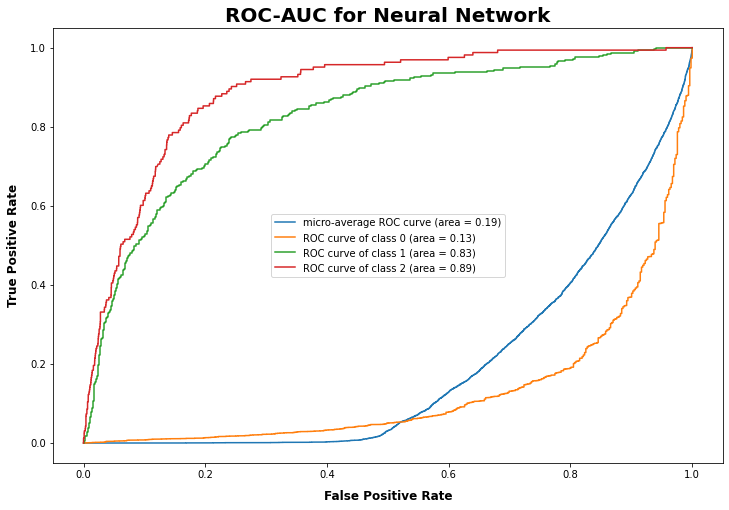

In [74]:
# clf_Neural_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_Neural", MLPClassifier(hidden_layer_sizes=(150,), activation='logistic', solver='adam', shuffle=True, random_state=42, tol=0.001, early_stopping=True, validation_fraction=0.2))])
# clf_Neural_pipe.fit(X_train, X_train_targetSentiment)

probNeural = clf_Neural_pipe.predict_proba(X_test)
#probNeural = clf_Neural_pipe.decision_function(X_test)
#print(probNeural.shape)

fprNeural, tprNeural, roc_aucNeural = dict(), dict(), dict()
n_classes = y_train.shape[1]

for i in range(n_classes):
    fprNeural[i], tprNeural[i], _ = sklearn.metrics.roc_curve(y_test[:, i], probNeural[:, i])
    roc_aucNeural[i] = sklearn.metrics.auc(fprNeural[i], tprNeural[i])

fprNeural["micro"], tprNeural["micro"], _ = sklearn.metrics.roc_curve(y_test.ravel(), probNeural[:,1:].ravel())
roc_aucNeural["micro"] = sklearn.metrics.auc(fprNeural["micro"], tprNeural["micro"])

plt.figure(figsize=(12,8))
plt.plot(fprNeural["micro"], tprNeural["micro"], label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_aucNeural["micro"]))

#plt.plot(fprNeural[0], tprNeural[0], label='ROC curve of class \"Positive\" (area = {1:0.2f})'''.format(roc_aucNeural[1]))
for i in range(n_classes):
    plt.plot(fprNeural[i], tprNeural[i], label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_aucNeural[i]))

plt.xlabel('False Positive Rate', labelpad=10, weight='bold', size=12)
plt.ylabel('True Positive Rate', labelpad=10, weight='bold', size=12)
plt.title('ROC-AUC for Neural Network', weight='bold', size=20)
plt.legend(loc="best")
plt.show()

# Saved models

Function for plotting ROC curve

In [20]:
def ROC_plot(pred_prob, n_classes):

  fpr, tpr, roc_auc = dict(), dict(), dict()

  for i in range(n_classes):
    fpr[i], tpr[i], _ = sklearn.metrics.roc_curve(y_test[:, i], pred_prob[:, i])
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])

  fpr["micro"], tpr["micro"], _ = sklearn.metrics.roc_curve(y_test.ravel(), pred_prob[:,1:].ravel())
  roc_auc["micro"] = sklearn.metrics.auc(fpr["micro"], tpr["micro"])

  plt.figure(figsize=(12,8))
  plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["micro"]))

  for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

  plt.xlabel('False Positive Rate', labelpad=10, weight='bold', size=12)
  plt.ylabel('True Positive Rate', labelpad=10, weight='bold', size=12)
  plt.title('ROC-AUC Plot', weight='bold', size=20)
  plt.legend(loc="best")
  plt.show()

## Multinomial Naive Bayes

In [21]:
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB(alpha=1.3, fit_prior=False))])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

joblib.dump(clf_multiNB_pipe, 'Multi_NB')

['Multi_NB']

In [22]:
mNB = joblib.load('Multi_NB')

mNB_pred = mNB.predict(X_test)
pmNB = label_binarize(mNB_pred, classes=["Positive", "Neutral", "Negative"])
mNB_prob = mNB.predict_proba(X_test)


Log Loss:  2.4543128858994234

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.94      0.99      0.96      6452
     Neutral       0.21      0.04      0.07       286
    Negative       0.41      0.05      0.09       183

   micro avg       0.93      0.93      0.93      6921
   macro avg       0.52      0.36      0.37      6921
weighted avg       0.89      0.93      0.90      6921
 samples avg       0.93      0.93      0.93      6921



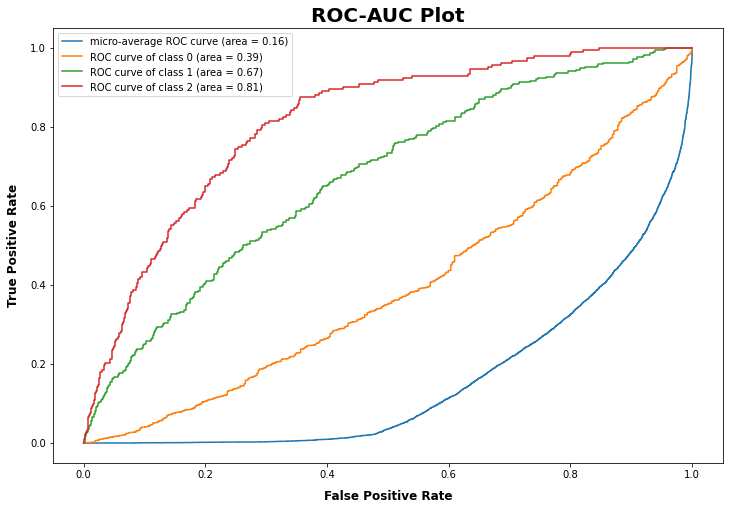

In [23]:
print("\nLog Loss: " , sklearn.metrics.log_loss(y_test, pmNB))
print("\nClassification Report: \n", sklearn.metrics.classification_report(y_test, pmNB, target_names=['Positive', 'Neutral', 'Negative']))

ROC_plot(mNB_prob, 3)

## Logistic Regression

In [24]:
clf_logReg_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression(penalty='l1', C=0.2, solver='saga', n_jobs=-1))])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

joblib.dump(clf_logReg_pipe, 'Log_Reg')

['Log_Reg']

In [25]:
LR = joblib.load('Log_Reg')

LR_pred = LR.predict(X_test)
pLR = label_binarize(LR_pred, classes=["Positive", "Neutral", "Negative"])
LR_prob = LR.predict_proba(X_test)


Log Loss:  2.3138885716486524

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.93      1.00      0.97      6452
     Neutral       0.42      0.03      0.06       286
    Negative       0.50      0.02      0.03       183

   micro avg       0.93      0.93      0.93      6921
   macro avg       0.62      0.35      0.35      6921
weighted avg       0.90      0.93      0.90      6921
 samples avg       0.93      0.93      0.93      6921



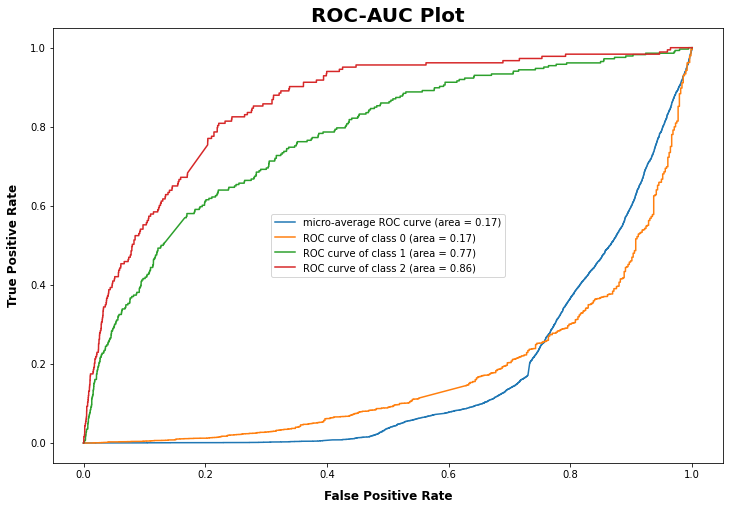

In [26]:
print("\nLog Loss: " , sklearn.metrics.log_loss(y_test, pLR))
print("\nClassification Report: \n", sklearn.metrics.classification_report(y_test, pLR, target_names=['Positive', 'Neutral', 'Negative']))

ROC_plot(LR_prob, 3)

## Linear SVM

In [27]:
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_linearSVC", SVC(C=1, kernel='linear', probability=True, random_state=42))])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

joblib.dump(clf_linearSVC_pipe, 'Linear_SVM')

['Linear_SVM']

In [28]:
LSVC = joblib.load('Linear_SVM')

LSVC_pred = LSVC.predict(X_test)
pLSVC = label_binarize(LSVC_pred, classes=["Positive", "Neutral", "Negative"])
LSVC_prob = LSVC.predict_proba(X_test)


Log Loss:  2.2041783376480697

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.94      1.00      0.97      6452
     Neutral       0.00      0.00      0.00       286
    Negative       0.76      0.16      0.26       183

   micro avg       0.94      0.94      0.94      6921
   macro avg       0.57      0.39      0.41      6921
weighted avg       0.89      0.94      0.91      6921
 samples avg       0.94      0.94      0.94      6921



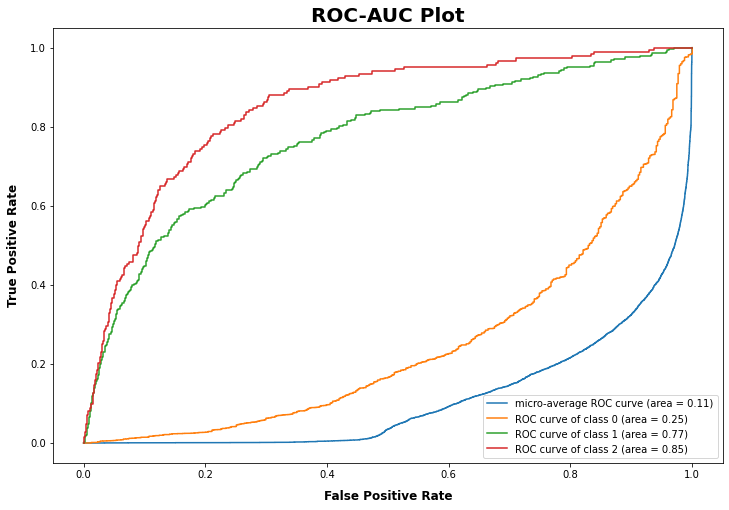

In [29]:
print("\nLog Loss: " , sklearn.metrics.log_loss(y_test, pLSVC))
print("\nClassification Report: \n", sklearn.metrics.classification_report(y_test, pLSVC, target_names=['Positive', 'Neutral', 'Negative']))

ROC_plot(LSVC_prob, 3)

## KNN classifier

In [30]:
clf_KNN_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_KNN", KNeighborsClassifier(n_neighbors=2000, n_jobs=-1))])
clf_KNN_pipe.fit(X_train, X_train_targetSentiment)

joblib.dump(clf_KNN_pipe, 'KNN')

['KNN']

In [31]:
KNN = joblib.load('KNN')

KNN_pred = KNN.predict(X_test)
pKNN = label_binarize(KNN_pred, classes=["Positive", "Neutral", "Negative"])
KNN_prob = KNN.predict_proba(X_test)


Log Loss:  2.3388227157396937

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.93      1.00      0.96      6452
     Neutral       0.00      0.00      0.00       286
    Negative       0.00      0.00      0.00       183

   micro avg       0.93      0.93      0.93      6921
   macro avg       0.31      0.33      0.32      6921
weighted avg       0.87      0.93      0.90      6921
 samples avg       0.93      0.93      0.93      6921



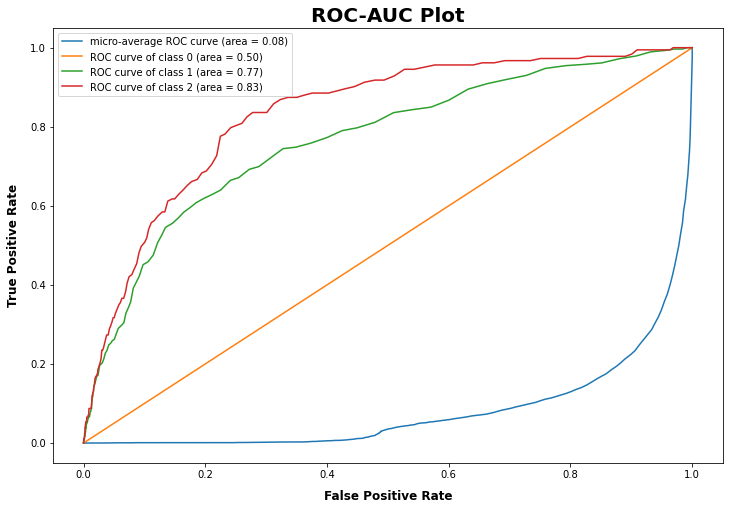

In [32]:
print("\nLog Loss: " , sklearn.metrics.log_loss(y_test, pKNN))
print("\nClassification Report: \n", sklearn.metrics.classification_report(y_test, pKNN, target_names=['Positive', 'Neutral', 'Negative']))

ROC_plot(KNN_prob, 3)

## Neural Network w/ ReLU activation

In [33]:
clf_Neural_relu_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_Neural", MLPClassifier(hidden_layer_sizes=(150,), activation='relu', solver='adam', shuffle=True, random_state=42, tol=0.001, early_stopping=True, validation_fraction=0.2))])
clf_Neural_relu_pipe.fit(X_train, X_train_targetSentiment)

joblib.dump(clf_Neural_relu_pipe, 'NN_relu')

['NN_relu']

In [34]:
NN_relu = joblib.load('NN_relu')

NN_relu_pred = NN_relu.predict(X_test)
pNN_relu = label_binarize(NN_relu_pred, classes=["Positive", "Neutral", "Negative"])
NN_relu_prob = NN_relu.predict_proba(X_test)


Log Loss:  2.3388227157396937

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.93      1.00      0.96      6452
     Neutral       0.00      0.00      0.00       286
    Negative       0.00      0.00      0.00       183

   micro avg       0.93      0.93      0.93      6921
   macro avg       0.31      0.33      0.32      6921
weighted avg       0.87      0.93      0.90      6921
 samples avg       0.93      0.93      0.93      6921



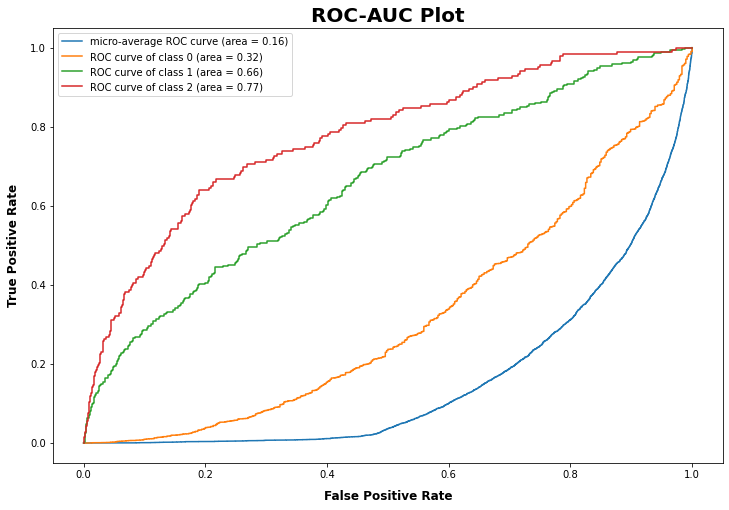

In [35]:
print("\nLog Loss: " , sklearn.metrics.log_loss(y_test, pNN_relu))
print("\nClassification Report: \n", sklearn.metrics.classification_report(y_test, pNN_relu, target_names=['Positive', 'Neutral', 'Negative']))

ROC_plot(NN_relu_prob, 3)

## Neural Network w/ Sigmoid activation

In [36]:
clf_Neural_sigmoid_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_Neural", MLPClassifier(hidden_layer_sizes=(150,), activation='logistic', solver='adam', shuffle=True, random_state=42, tol=0.001, early_stopping=True, validation_fraction=0.2))])
clf_Neural_sigmoid_pipe.fit(X_train, X_train_targetSentiment)

joblib.dump(clf_Neural_sigmoid_pipe, 'NN_sigmoid')

['NN_sigmoid']

In [37]:
NN_sig = joblib.load('NN_sigmoid')

NN_sig_pred = NN_sig.predict(X_test)
pNN_sig = label_binarize(NN_sig_pred, classes=["Positive", "Neutral", "Negative"])
NN_sig_prob = NN_sig.predict_proba(X_test)


Log Loss:  2.318875400466861

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.93      1.00      0.97      6452
     Neutral       0.56      0.02      0.03       286
    Negative       0.00      0.00      0.00       183

   micro avg       0.93      0.93      0.93      6921
   macro avg       0.50      0.34      0.33      6921
weighted avg       0.89      0.93      0.90      6921
 samples avg       0.93      0.93      0.93      6921



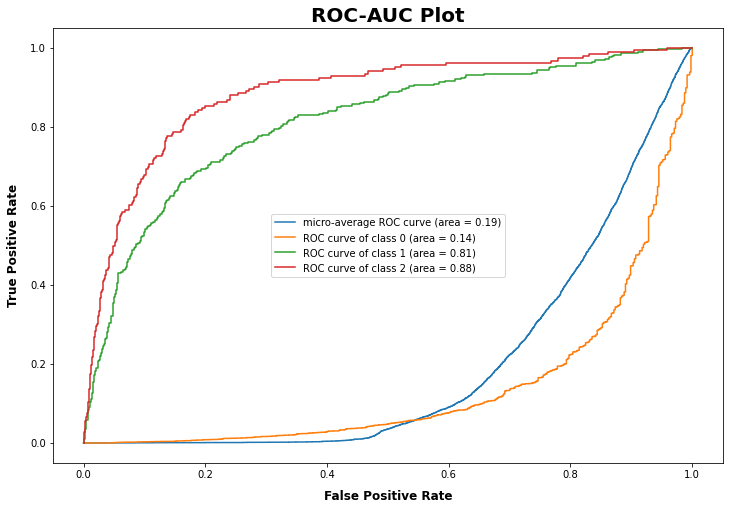

In [38]:
print("\nLog Loss: " , sklearn.metrics.log_loss(y_test, pNN_sig))
print("\nClassification Report: \n", sklearn.metrics.classification_report(y_test, pNN_sig, target_names=['Positive', 'Neutral', 'Negative']))

ROC_plot(NN_sig_prob, 3)

# Results



*   After testing some random text reviews, we could observe that our features are performing correctly with Positive, Neutral and Negative revie
*   List item



# Future Work

In [ ]:
#clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_SVC_pipe = Pipeline([("vect", CountVectorizer(lowercase=True, stop_words='english')), ("tfidf", TfidfTransformer()), ("clf_SVC", SVC(probability=True, random_state=42))])
#clf_SVC_pipe.fit(X_train, X_train_targetSentiment)

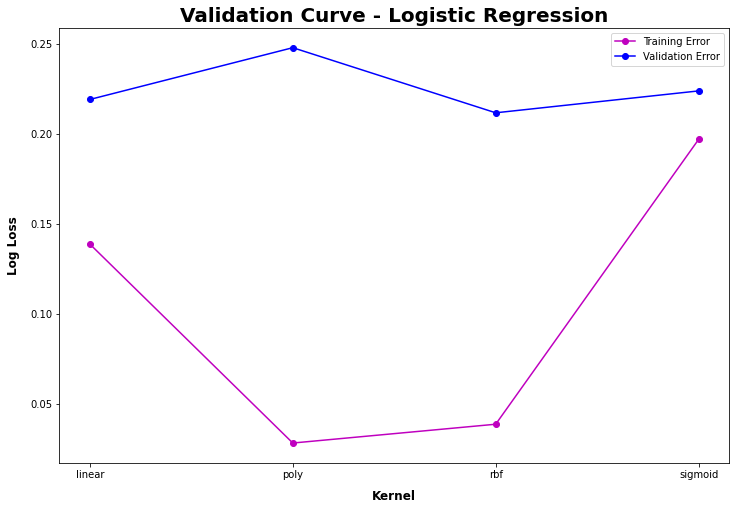

In [ ]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

train_param_SVC, val_param_SVC = validation_curve(clf_SVC_pipe, X_train, X_train_targetSentiment, param_name='clf_SVC__kernel', param_range=kernel, cv=5, scoring='neg_log_loss', n_jobs=-1)

tpar_SVC_mean = -np.mean(train_param_SVC, axis=1)
vpar_SVC_mean = -np.mean(val_param_SVC, axis=1) 

plt.figure(figsize=(12,8))
plt.plot(kernel, tpar_SVC_mean, 'o-', color='m', label='Training Error')
plt.plot(kernel, vpar_SVC_mean, 'o-', color='b', label='Validation Error')  
plt.xlabel("Kernel", labelpad=10, weight='bold', size=12)
plt.ylabel("Log Loss", labelpad=10, weight='bold', size=12)
plt.title("Validation Curve - Support Vector Machine", weight='bold', size=20)
plt.legend(loc="best", fontsize='medium')
plt.show()

# Miscellaneous



*   We will be running a Grid Search of the best parameters on a grid of possible values.

*   It will also be run with Linear Support Vector Classifier pipeline and cpu core maximization.

*   Further, we will fit the grid search to our training data set.



In [ ]:
# parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
#              'tfidf__use_idf': (True, False), 
#              } 
# gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
# gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, X_train_targetSentiment)

In [ ]:
# predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test)
# np.mean(predictedGS_clf_LinearSVC_pipe == X_test_targetSentiment)

0.9317066127634999